In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [3]:
loan = pd.read_csv("loan.csv", low_memory=False)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [4]:
loan.shape

(39717, 111)

#### The objective is to identify the variables that would most likely contribute to defaulting of a loan.

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,0.00,39717.00,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0

In [6]:
missing = round(100*(loan.isnull().sum() / len(loan.index)), 2)
missing.loc[missing > 0]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


In [7]:
missing_columns = list(missing[missing >= 90].index)

len(missing_columns)

56

In [8]:
# Drop the columns from the loan data set and collect into a new subset.
# to preserve the contents of the original data set.
print("The Shape before removing null columns :",loan.shape)
loan_subset = loan.drop(missing_columns,axis=1)
print("Shape after removing null columns with >=90% :",loan_subset.shape)

The Shape before removing null columns : (39717, 111)
Shape after removing null columns with >=90% : (39717, 55)


In [9]:
missing = round(100*(loan_subset.isnull().sum()/len(loan_subset.index)), 2)
missing[missing != 0]

emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
mths_since_last_delinq       64.66
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [10]:
loan_subset.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,39717.00,39717.00,39661.00,39717.00,39020.00,39678.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,1.00,0.00,0.00,0.00,0.04,0.00
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,0.00,0.00,0.00,0.00,0.20,0.00
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,52.00,12.00,0.00,17058.00,29.00,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,3293.16,0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,120.00,44.00,4.00,149588.00,90.00,6311.47,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,0.00,1.00,0.00,0.00,0.00,2.00,0.00


#### We will be using the 'loan_status' column from the data subset to understand the status of the loan i.e. if the loan has been paid off or is currently being paid or if the applicant has defaulted the loan.

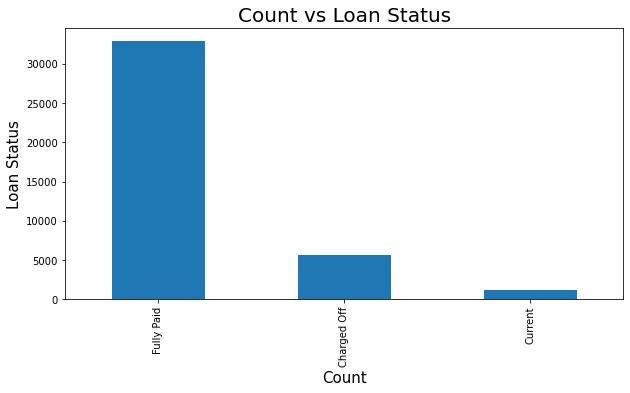

In [11]:
# Let's plot a bar graph to see how the distribution is for each of the 'loan_status' values
plt.figure(figsize=(10,5))
loan_subset['loan_status'].value_counts().plot.bar()
plt.title('Count vs Loan Status', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Loan Status', fontsize = 15)
plt.show()

In [12]:
loan_subset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [13]:
loan_subset.shape

(39717, 55)

In [14]:
a = list(loan_subset.columns)
for i in a:
    print("The Unique Values in",i,"is = ", len(loan_subset[i].unique()))

The Unique Values in id is =  39717
The Unique Values in member_id is =  39717
The Unique Values in loan_amnt is =  885
The Unique Values in funded_amnt is =  1041
The Unique Values in funded_amnt_inv is =  8205
The Unique Values in term is =  2
The Unique Values in int_rate is =  371
The Unique Values in installment is =  15383
The Unique Values in grade is =  7
The Unique Values in sub_grade is =  35
The Unique Values in emp_title is =  28821
The Unique Values in emp_length is =  12
The Unique Values in home_ownership is =  5
The Unique Values in annual_inc is =  5318
The Unique Values in verification_status is =  3
The Unique Values in issue_d is =  55
The Unique Values in loan_status is =  3
The Unique Values in pymnt_plan is =  1
The Unique Values in url is =  39717
The Unique Values in desc is =  26528
The Unique Values in purpose is =  14
The Unique Values in title is =  19616
The Unique Values in zip_code is =  823
The Unique Values in addr_state is =  50
The Unique Values in d

In [15]:
loan_subset.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

## Dropping Columns with only one unique values

In [16]:
loan_subset = loan_subset.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1)

In [17]:
loan_subset.shape

(39717, 46)

Finding the high number of unique values columns

In [18]:
loan.nunique().sort_values(ascending=False).head(20)

id                         39717
member_id                  39717
url                        39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
desc                       26527
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
dtype: int64

### Only use id primary key and remove url and member id columns.

In [19]:
loan_subset = loan_subset.drop(['member_id', 'url'], axis=1)

In [20]:
loan_subset.shape

(39717, 44)

In [21]:
loan_subset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


In [22]:
loan_subset = loan_subset.drop(['title'], axis=1)

In [23]:
loan_subset.shape

(39717, 43)

For the purpose of this exercise we will not be considering the Applicants/Customer Behavioral Variables and that leaves us with the following columns:loan_amnt, Term, int_rate, Grade, Subgrade, annual_inc, Purpose, Emp_len, DTI, issue_d, Home_Ownership, Verification_Status.


In [24]:
loan_subset = loan_subset.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1)
loan_subset = loan_subset.drop(['out_prncp', 'out_prncp_inv'], axis=1)

In [25]:
loan_subset.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,860xx,AZ,27.65,0,Jan-85,1,nan,3,0,13648,83.70%,9,5863.16,5833.84,171.62,0.00
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,309xx,GA,1.00,0,Apr-99,5,nan,3,0,1687,9.40%,4,1008.71,1008.71,119.66,0.00
2,1077175,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,NaN,small_business,606xx,IL,8.72,0,Nov-01,2,nan,2,0,2956,98.50%,10,3005.67,3005.67,649.91,0.00
3,1076863,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,917xx,CA,20.00,0,Feb-96,1,35.00,10,0,5598,21%,37,12231.89,12231.89,357.48,0.00
4,1075358,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,972xx,OR,17.94,0,Jan-96,0,38.00,15,0,27783,53.90%,38,3513.33,3513.33,67.79,0.00


In [26]:
loan_subset.shape

(39717, 34)

#### Finding the null missing values cloumns

In [27]:
missing = round(100*(loan_subset.isnull().sum()/len(loan_subset.index)), 2)
missing[missing > 0 ]

emp_title                 6.19
emp_length                2.71
desc                     32.58
mths_since_last_delinq   64.66
revol_util                0.13
pub_rec_bankruptcies      1.75
dtype: float64

Removing the null value rows because the missing value parcentage is less than 10.

In [28]:
loan_subset = loan_subset.dropna(subset=['emp_length'])
loan_subset.shape

(38642, 34)

In [29]:
## Finding the null value rows after removing the null values
missing = round(100*(loan_subset.isnull().sum()/len(loan_subset.index)), 2)
missing[missing > 0 ]

emp_title                 3.73
desc                     32.34
mths_since_last_delinq   64.57
revol_util                0.12
pub_rec_bankruptcies      1.80
dtype: float64

Loan Status column has three different categories we are interested only for fully paid and charged off. We can remove the current category.

In [30]:
loan_subset = loan_subset[~(loan_subset['loan_status'] == "Current")]

In [31]:
loan_subset.shape

(37544, 34)

In [32]:
## Checking the unique values in term column
loan_subset.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [33]:
loan_subset['term'] = loan_subset['term'].str.strip()
loan_subset.term.unique()

array(['36 months', '60 months'], dtype=object)

In [34]:
loan_subset.dtypes

id                          int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
desc                       object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
total_acc     

In [35]:
#### int_rate is having '%' symbol. Now remove % at the end and convert to float
loan_subset['int_rate'] = loan_subset['int_rate'].apply(lambda x: x.replace("%",""))
loan_subset['int_rate'] = loan_subset['int_rate'].astype("float64")

In [36]:
loan_subset.dtypes

id                          int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
desc                       object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                 object
total_acc     

Convert a proper datetime format in issue_d column.

In [37]:
loan_subset['issue_d'] = pd.to_datetime(loan_subset['issue_d'], format='%b-%y')
loan_subset['issue_d'] = loan_subset['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

Creating particular year, month and weekdays columns in the basis of the issue_d column.

In [38]:
#issue_d column
loan_subset['issue_d_year'] = loan_subset.issue_d.dt.year
loan_subset['issue_d_month'] = loan_subset.issue_d.dt.strftime('%b')
#data type conversion of year and weekday
loan_subset['issue_d_year'] = loan_subset['issue_d_year'].astype(object)

In [39]:
loan_subset.shape

(37544, 36)

In [40]:
loan_subset.dtypes

id                                 int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
desc                              object
purpose                           object
zip_code                          object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
earliest_cr_line                  object
inq_last_6mths                     int64
mths_since_last_

In [41]:
# zip_code is not important for our analysis.
loan_subset = loan_subset.drop(['zip_code'], axis = 1)

In [42]:
loan_subset['default']  = loan_subset['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

### Univariate Analysis

### Home Ownership vs Default Rate

In [43]:
# Here we are showing the percentage distribution in the home ownership column.
100 * loan_subset.home_ownership.value_counts()/len(loan_subset.home_ownership)

RENT       48.15
MORTGAGE   44.20
OWN         7.38
OTHER       0.26
NONE        0.01
Name: home_ownership, dtype: float64

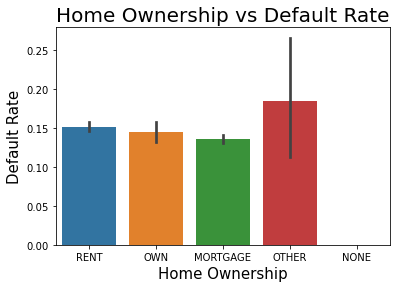

In [44]:
sns.barplot(x = 'home_ownership', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Home Ownership vs Default Rate' , fontsize = 20)
plt.xlabel('Home Ownership', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.show()

##### We should ignore the OTHER and NONE types of home ownership category because their contribution is very less within the distribution.
##### Opinion: The majority of the people that have defaulted have rented or mortgage homes. However, since there isn't a significant difference between Rent, Own and Mortgage characters, we choose to not consider this variable for our analysis.

### Verification Status vs Default Rate

In [45]:
# Here we are showing the percentage distribution in the verification status column.
100 * loan_subset.verification_status.value_counts()/len(loan_subset.verification_status)

Not Verified      43.36
Verified          31.36
Source Verified   25.29
Name: verification_status, dtype: float64

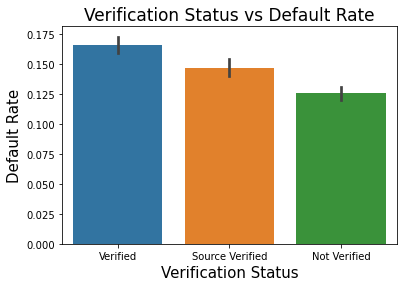

In [46]:
sns.barplot(x = 'verification_status', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Verification Status vs Default Rate' , fontsize = 17)
plt.xlabel('Verification Status', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.show()

#### Opinion: Applicants with Verification Status of Verified has the highest default rate among all the other categories.

### Grade vs Default Rate

In [47]:
# Here we are showing the percentage distribution in the grade column.
100 * loan_subset.grade.value_counts()/len(loan_subset.grade)

B   30.26
A   25.73
C   20.43
D   13.26
E    6.98
F    2.55
G    0.79
Name: grade, dtype: float64

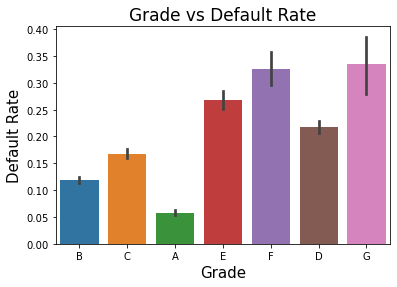

In [48]:
sns.barplot(x = 'grade', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Grade vs Default Rate' , fontsize = 17)
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.show()

#### We should ignore the F and G grade because their contribution is very less within the distribution.
#### Opinion: E has more default rate than other grade.

### Sub Grade vs Default Rate

In [49]:
# Here we are showing the percentage distribution in the sub grade column.
100 * loan_subset.sub_grade.value_counts()/len(loan_subset.sub_grade)

A4   7.44
B3   7.31
A5   7.02
B5   6.82
B4   6.36
C1   5.36
B2   5.18
C2   5.06
A3   4.64
B1   4.59
C3   3.88
A2   3.84
D2   3.34
C4   3.13
C5   2.99
D3   2.90
A1   2.80
D1   2.44
D4   2.41
D5   2.17
E1   1.89
E2   1.61
E3   1.34
E4   1.12
E5   1.01
F1   0.80
F2   0.61
F3   0.46
F4   0.39
F5   0.29
G1   0.25
G2   0.21
G4   0.14
G3   0.12
G5   0.08
Name: sub_grade, dtype: float64

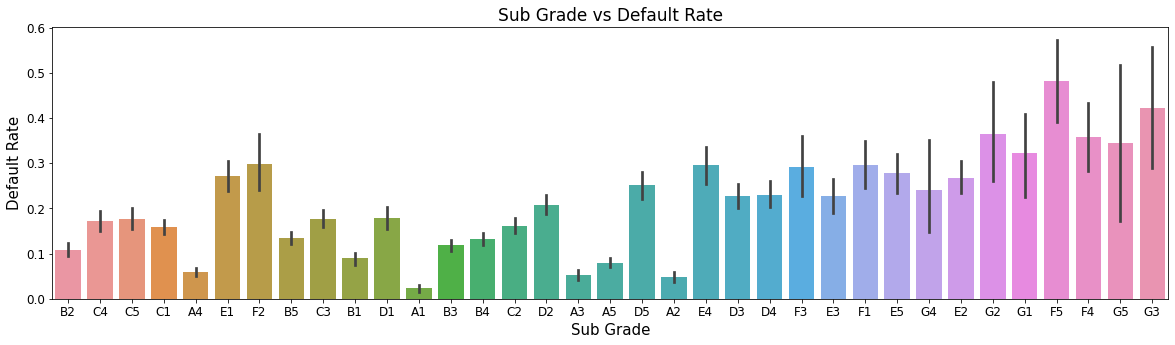

In [50]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'sub_grade', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Sub Grade vs Default Rate' , fontsize = 17)
plt.xlabel('Sub Grade', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.show()

##### Note: We will ignore the subgrades of F and G as their percentage distribution of applicants is very low.
##### Opinion: Applicants with E4, E5 and E1 sub grade have defaulted more than other sub grade .
There is not a significant difference between E4, E5 and E1.

### Purpose vs Default Rate

In [51]:
# Here we are showing the percentage distribution in the purpose column.
100 * loan_subset.purpose.value_counts()/len(loan_subset.purpose)

debt_consolidation   47.08
credit_card          13.05
other                 9.89
home_improvement      7.42
major_purchase        5.54
small_business        4.55
car                   3.86
wedding               2.43
medical               1.75
moving                1.47
house                 0.94
vacation              0.93
educational           0.84
renewable_energy      0.25
Name: purpose, dtype: float64

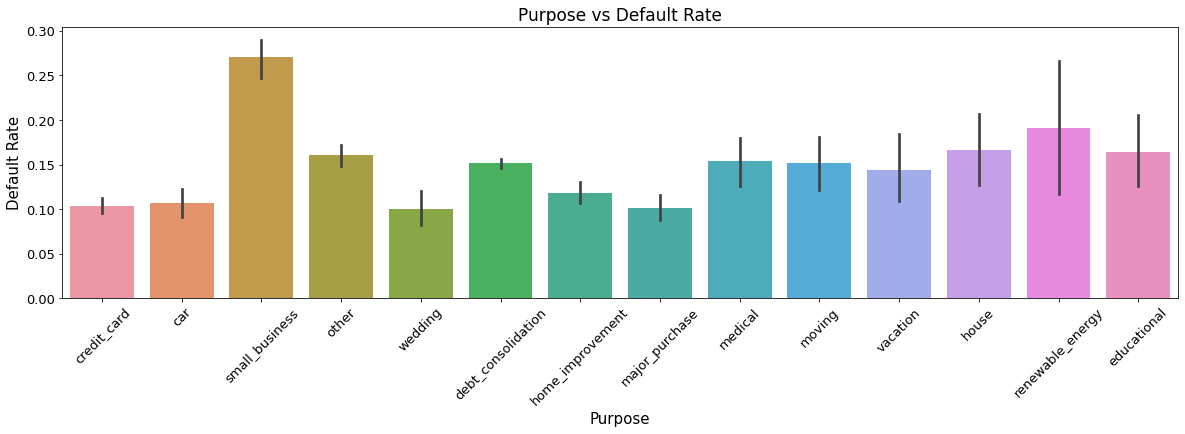

In [52]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'purpose', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Purpose vs Default Rate' , fontsize = 17)
plt.xlabel('Purpose', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 45)
plt.show()

#### We should ignore the wedding, medical, moving, house, vacation, educational, renewable_energy types of purpose because their contribution is very less within the distribution.
#### Opinion: Small business has the highest default rate followed by other and debt consolidation.

### Issued Month vs Default Rate

In [53]:
# Here we are showing the percentage distribution in the issued month column.
100 * loan_subset.issue_d_month.value_counts()/len(loan_subset.issue_d_month)

Dec   10.97
Nov   10.36
Oct    9.69
Sep    9.04
Aug    8.85
Jul    8.66
Jun    8.24
May    7.56
Apr    7.34
Mar    7.01
Jan    6.21
Feb    6.07
Name: issue_d_month, dtype: float64

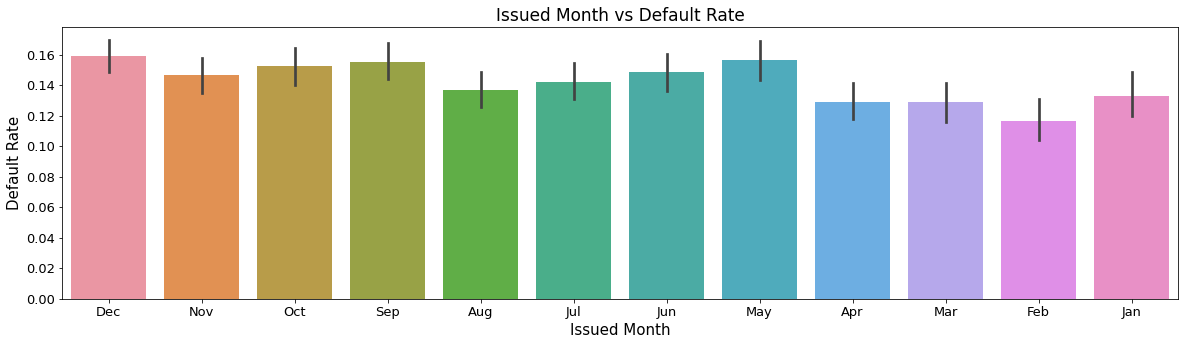

In [54]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'issue_d_month', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Issued Month vs Default Rate' , fontsize = 17)
plt.xlabel('Issued Month', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.show()

#### Opinion: Loan issued during the month of December have a higher chance of defaulting rate followed by May and September.
- There is no significant difference between the top three months.

### Term vs Default Rate

In [55]:
# Here we are showing the percentage distribution in the term column.
100 * loan_subset.term.value_counts()/len(loan_subset.term)

36 months   75.34
60 months   24.66
Name: term, dtype: float64

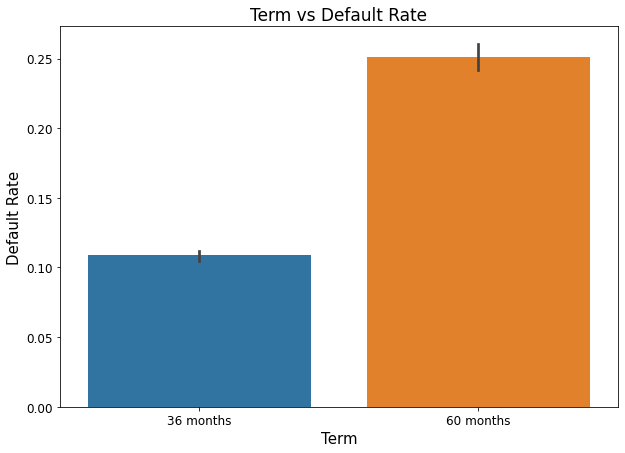

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'term', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Term vs Default Rate' , fontsize = 17)
plt.xlabel('Term', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.show()

#### Opinion: Borrowers have taken 60 months tenure more default rate than 36 months.

### Employment Length vs Default Rate

In [57]:
# Here we are showing the percentage distribution in the employment length column.
100 * loan_subset.emp_length.value_counts()/len(loan_subset.emp_length)

10+ years   22.61
< 1 year    12.01
2 years     11.43
3 years     10.69
4 years      8.90
5 years      8.51
1 year       8.44
6 years      5.77
7 years      4.56
8 years      3.82
9 years      3.27
Name: emp_length, dtype: float64

In [58]:
loan_subset['emp_length_cat'] = loan_subset['emp_length'].apply(lambda x: '0 - 4' if x in ['< 1 year', '1 year', '2 years','3 years','4 years']
                                                               else '5 - 8' if x in ['5 years', '6 years', '7 years','8 years']
                                                               else '8+')

In [59]:
# Here we are showing the percentage distribution in the employment length category column.
100 * loan_subset.emp_length_cat.value_counts()/len(loan_subset.emp_length_cat)

0 - 4   51.46
8+      25.87
5 - 8   22.66
Name: emp_length_cat, dtype: float64

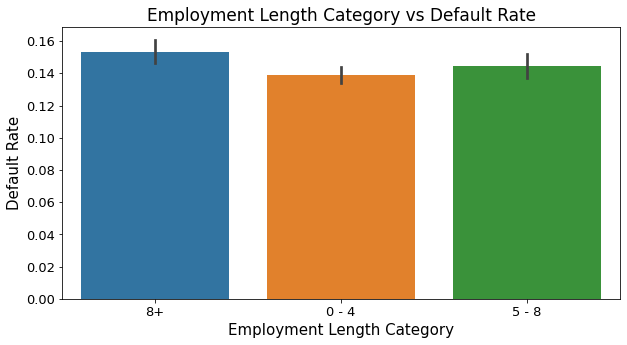

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'emp_length_cat', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Employment Length Category vs Default Rate' , fontsize = 17)
plt.xlabel('Employment Length Category', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.show()

#### Opinion: 8+ years of employment length having the highest default rate than other. However, the difference between the various Employment Length Categories is very less

### Address
State vs Default Rate

In [61]:
# Here we are showing the percentage distribution in the addr_state column.
100 * loan_subset.addr_state.value_counts()/len(loan_subset.addr_state)

CA   18.03
NY    9.59
FL    7.18
TX    6.94
NJ    4.71
IL    3.84
PA    3.83
VA    3.57
GA    3.51
MA    3.38
OH    3.05
MD    2.68
AZ    2.15
WA    2.09
CO    1.98
NC    1.93
CT    1.88
MI    1.79
MO    1.72
MN    1.55
NV    1.24
SC    1.20
WI    1.13
OR    1.12
AL    1.11
LA    1.11
KY    0.82
OK    0.75
UT    0.66
KS    0.65
AR    0.60
DC    0.56
RI    0.51
NM    0.48
WV    0.44
HI    0.43
NH    0.42
DE    0.29
MT    0.21
AK    0.20
WY    0.20
SD    0.16
VT    0.14
MS    0.05
TN    0.05
IN    0.02
ID    0.02
IA    0.01
NE    0.01
ME    0.01
Name: addr_state, dtype: float64

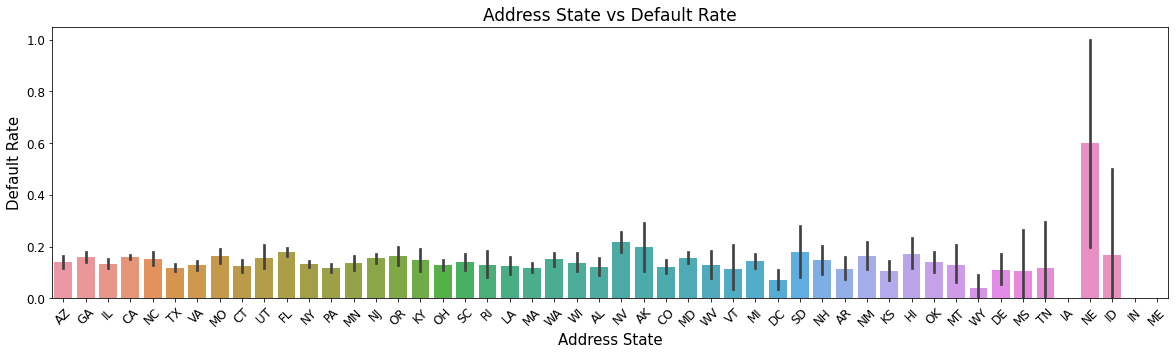

In [62]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'addr_state', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Address State vs Default Rate' , fontsize = 17)
plt.xlabel('Address State', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.xticks(rotation = 45)
plt.show()

#### Opinion: NE has the highest default rate.
We will not be considering this variable as this gives the default rates for a specific country only.

### Loan Amount vs Default Rate

In [63]:
loan_subset.loan_amnt.value_counts()

10000    2742
12000    2213
5000     1959
6000     1834
15000    1805
         ... 
21825       1
700         1
18275       1
20450       1
28750       1
Name: loan_amnt, Length: 866, dtype: int64

In [64]:
loan_subset.loan_amnt.describe()

count   37544.00
mean    11119.33
std      7354.10
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [65]:
# Using the above info, let's consider a step size of 15000 to derive a new categorical column using the numerical column loan_amnt
loan_subset['loan_amnt_cat'] = loan_subset['loan_amnt'].apply(lambda a : 'Very low' if a <= 7000 else 'Low' if (a > 7000 and a <= 14000)
                                                              else 'Medium' if (a > 14000 and a <= 21000) else 'High' if (a > 21000 and a <= 28000)
                               else 'Veryhigh')
# Here we are showing the percentage distribution in the loan amount category column.
100 * loan_subset['loan_amnt_cat'].value_counts()/len(loan_subset.loan_amnt_cat)

Very low   36.60
Low        34.66
Medium     18.42
High        7.33
Veryhigh    2.99
Name: loan_amnt_cat, dtype: float64

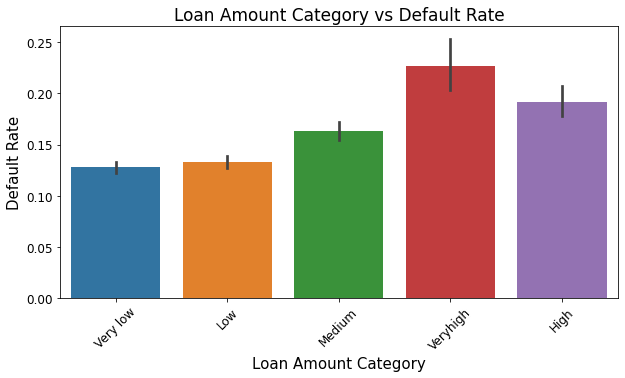

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'loan_amnt_cat', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Loan Amount Category vs Default Rate' , fontsize = 17)
plt.xlabel('Loan Amount Category', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.xticks(rotation = 45)
plt.show()

#### In general we observed more defaults as the loan increases and that is what we can see above plot but for the sake of unbiased analysis we will be ignoring the category very high as it's contribution is extremely low.
#### Opinion: Considering the above we can conclude that majority of the defaults have been seen when the loan amount is high(21k to 28k)

### DTI vs Default Rate

In [67]:
loan_subset.dti.describe()

count   37544.00
mean       13.28
std         6.66
min         0.00
25%         8.16
50%        13.38
75%        18.55
max        29.99
Name: dti, dtype: float64

In [68]:
# Considering a step size of 3 to categorize the dti column
loan_subset['dti_cat'] = loan_subset['dti'].apply(lambda a : 'Low' if a <= 10 else 'Medium' if (a > 10 and a <= 20) else 'High')
# Here we are showing the percentage distribution in the dti_cat column.
100 * loan_subset['dti_cat'].value_counts()/len(loan_subset.dti_cat)

Medium   47.95
Low      33.41
High     18.64
Name: dti_cat, dtype: float64

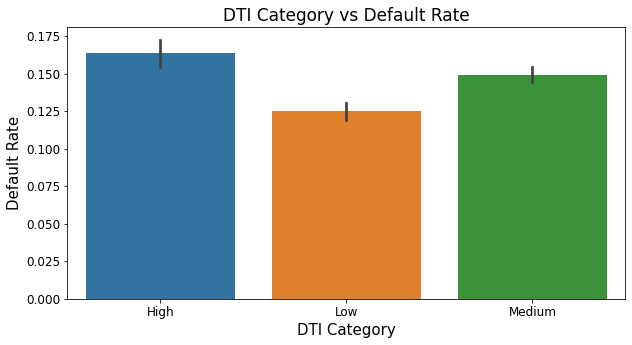

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'dti_cat', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('DTI Category vs Default Rate' , fontsize = 17)
plt.xlabel('DTI Category', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.show()

#### DTI or Debt To Income Ratio indicates the percentage of debts over income. Higher the dti higher the risk to defult which can seen the above plot.
#### Opinion: Higher DTI(>20) corrosponds to higher default rate.

annual income and interest rate to do

### Annual Income vs Default Rate

In [70]:
loan_subset.annual_inc.describe()

count     37544.00
mean      69407.08
std       64676.98
min        4000.00
25%       41000.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [71]:
# Considering a step size of 3 to categorize the annual_inc column
loan_subset['annual_inc_cat'] = loan_subset['annual_inc'].apply(lambda a : 'Low' if a <= 50000 else 'Medium' if (a > 50000 and a <= 100000) else 'High')
# Here we are showing the percentage distribution in the annual_inc_cat column.
100 * loan_subset['annual_inc_cat'].value_counts()/len(loan_subset.annual_inc_cat)

Medium   46.43
Low      39.10
High     14.47
Name: annual_inc_cat, dtype: float64

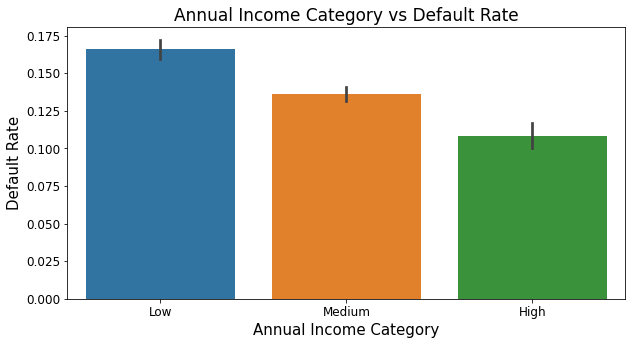

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'annual_inc_cat', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Annual Income Category vs Default Rate' , fontsize = 17)
plt.xlabel('Annual Income Category', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.show()

#### Lower the annual income higher the risk to defult which can seen the above plot.
#### Opinion: Lower Annual Income(<= 50000) corrosponds to higher default rate.

### Interest Rate vs Default Rate

In [73]:
loan_subset.int_rate.describe()

count   37544.00
mean       11.96
std         3.68
min         5.42
25%         8.94
50%        11.83
75%        14.42
max        24.40
Name: int_rate, dtype: float64

In [74]:
# Considering a step size of 4 to categorize int_rate column
loan_subset['int_rate_cat'] = loan_subset['int_rate'].apply(lambda a : 'Low' if a <= 10 else 'Medium' if (a > 10 and a <= 15) else 'High'
                                                           if (a > 15 and a <= 20) else 'Veryhigh')
# Here we are showing the percentage distribution in the int_rate_cat column.
100 * loan_subset['int_rate_cat'].value_counts()/len(loan_subset.int_rate_cat)

Medium     47.62
Low        31.52
High       18.83
Veryhigh    2.02
Name: int_rate_cat, dtype: float64

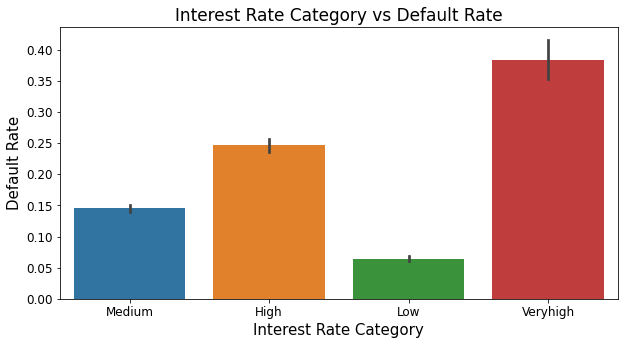

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'int_rate_cat', y = 'default', data = loan_subset, estimator=np.mean)
plt.title('Interest Rate Category vs Default Rate' , fontsize = 17)
plt.xlabel('Interest Rate Category', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.show()


#### In general we observed more defaults as the interest rate increases and that is what we can see above plot but for the sake of unbiased analysis we will be ignoring the category veryhigh as it's contribution is extremely low.
#### Opinion: High Interest Rate(>20 Percent) corrosponds to higher default rate.

## Bivariate Analysis
#### Bivariate Analysis with Term as the hue

In [76]:
# Making sure that there isn't a much of imbalance in the unique values for Term and Issued Month, before plotting the graph
print(loan_subset['term'].value_counts())

36 months    28287
60 months     9257
Name: term, dtype: int64


In [77]:
# Percentage of distribution
(loan_subset['term'].value_counts() / loan_subset['term'].value_counts().sum()) * 100

36 months   75.34
60 months   24.66
Name: term, dtype: float64

Approximately ~76% of applicants chose the 36 month term while ~24% of the applicants chose the 60 month term. We should be ok in considering this variable for our analysis, we will be ignoring those variables that have the imbalance percentage greater than 90.

#### Term - Loan Amount vs Default Rate

In [78]:
# Percentage of distribution
(loan_subset['loan_amnt_cat'].value_counts() / loan_subset['loan_amnt_cat'].value_counts().sum()) * 100

Very low   36.60
Low        34.66
Medium     18.42
High        7.33
Veryhigh    2.99
Name: loan_amnt_cat, dtype: float64

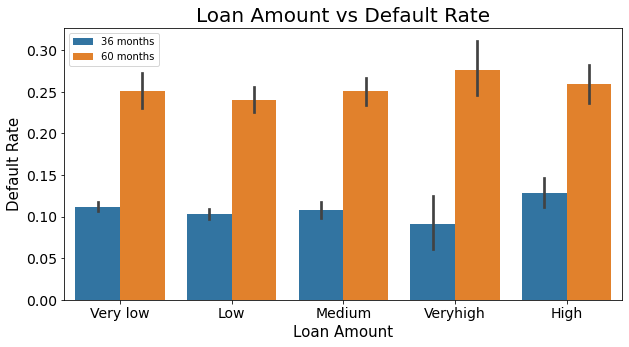

In [79]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='loan_amnt_cat', y='default', hue='term', estimator=np.mean)
plt.title('Loan Amount vs Default Rate', fontsize = 20)
plt.xlabel('Loan Amount', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 14)
plt.legend(loc = 'best')
plt.show()

#### We will ignore the category very high for this analysis beacuse it's contribution is very less. 
#### Opinion: The default rate is the highest when the loan amount category is high(21k to 28k) for the 60 month term. The difference between High and the other categories is very small and probably insignificant. 

#### Term - Issued Month vs Default Rate

In [80]:
# Checking the distribution of the month variable
print(loan_subset['issue_d_month'].value_counts())

Dec    4120
Nov    3890
Oct    3637
Sep    3394
Aug    3321
Jul    3253
Jun    3094
May    2838
Apr    2756
Mar    2632
Jan    2331
Feb    2278
Name: issue_d_month, dtype: int64


In [81]:
# Percentage of distribution
(loan_subset['issue_d_month'].value_counts() / loan_subset['issue_d_month'].value_counts().sum()) * 100

Dec   10.97
Nov   10.36
Oct    9.69
Sep    9.04
Aug    8.85
Jul    8.66
Jun    8.24
May    7.56
Apr    7.34
Mar    7.01
Jan    6.21
Feb    6.07
Name: issue_d_month, dtype: float64

We can see that the number of loan applications mostly go up as we move towards the end of the year with December receiving the highest number of applications. Although it is visible that there is a certain level of imbalance in the above data, it most certainly is not huge to worry us. So we can ahead with plotting the required graph.

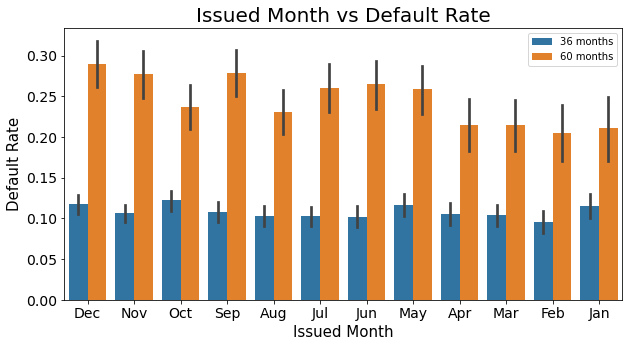

In [82]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='issue_d_month', y='default', hue='term', estimator=np.mean)
plt.title('Issued Month vs Default Rate', fontsize = 20)
plt.xlabel('Issued Month', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 14)
plt.legend(loc = 'best')
plt.show()

#### Opinion: We can see from the above plot that the applications who opted for 60 months term in December have defaulted more than the applicants who have opted for 36 months.

### Term - Issued Year vs Default Rate

In [83]:
# Making sure that there isn't a much of imbalance in the unique values Issued Year
print(loan_subset['issue_d_year'].value_counts())

2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: issue_d_year, dtype: int64


The above stats indicate that the number of applications have gone up from 2007 to 2011, with 2007 receiving the lowest number of applications and 2011 receiving the highest. Although, we see a large difference in the applications between 2011 and 2007, we can still go ahead with analysing this variable as the years 2010 and 2009 seem to be having a decent number of applications

The variable year appears to be very broad to provide any meaningful insights for our exercise. However, we will still be plotting a graph to understand the trend.

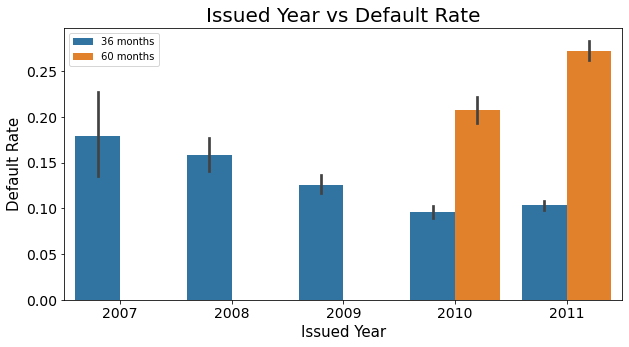

In [84]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='issue_d_year', y='default', hue='term', estimator=np.mean)
plt.title('Issued Year vs Default Rate', fontsize = 20)
plt.xlabel('Issued Year', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 14)
plt.legend(loc = 'best')
plt.show()

#### Opinion: We can see that the default rate is the largest for the year 2011, but this isn't a valid driver variable, as the variable year doesn't provide meaningful information, as it is very widespread.

### Term - Verification Status vs Default Rate

In [85]:
# Making sure that there isn't a much of imbalance in the unique values Verification Status
print(loan_subset['verification_status'].value_counts())

Not Verified       16278
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64


In [86]:
# Percentage of distribution
(loan_subset['verification_status'].value_counts() / loan_subset['verification_status'].value_counts().sum()) * 100

Not Verified      43.36
Verified          31.36
Source Verified   25.29
Name: verification_status, dtype: float64

We can see from above that the imbalance isn't large and we can continue with our analysis. We can also infer from the above stats, that majority of the applicants were 'Not Verified', while a slightly lesser number of applicants were 'Verified' and a further lesser number of applicants have been categorized under 'Source Verified'

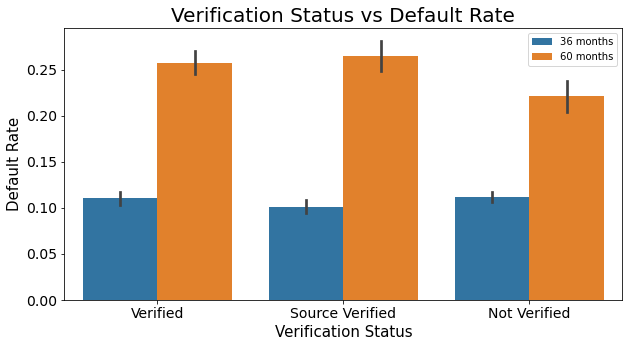

In [87]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='verification_status', y='default', hue='term', estimator=np.mean)
plt.title('Verification Status vs Default Rate', fontsize = 20)
plt.xlabel('Verification Status', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 14)
plt.legend(loc = 'best')
plt.show()

#### Opinion: Applicants, with the Verification Status of 'Source Verified' and 'Verified' have defaulted more when the term was 60 months, however applicants with the Verification Status as 'Not Verified' have defaulted more when the term is 36 months. Although it is important to note that the differences are very small (for each term type). This variable perhaps isn't valid as it does not make sense to directly correlate Verified/Source Verified with higher Default rates.

### Term - Home Ownership vs Default Rate

In [88]:
# Checking the distribution of various categories of Home Ownership
print(loan_subset['home_ownership'].value_counts())

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


In [89]:
# Percentage of distribution
(loan_subset['home_ownership'].value_counts() / loan_subset['home_ownership'].value_counts().sum()) * 100

RENT       48.15
MORTGAGE   44.20
OWN         7.38
OTHER       0.26
NONE        0.01
Name: home_ownership, dtype: float64

Majority of the applicants have Rented accomodation, with Mortgage being the close second, followed by Own and other categories. However, the variable appears to be imbalanced, with majority of the applicants concentrated in and around only 2 categories, Rent and Mortgage.

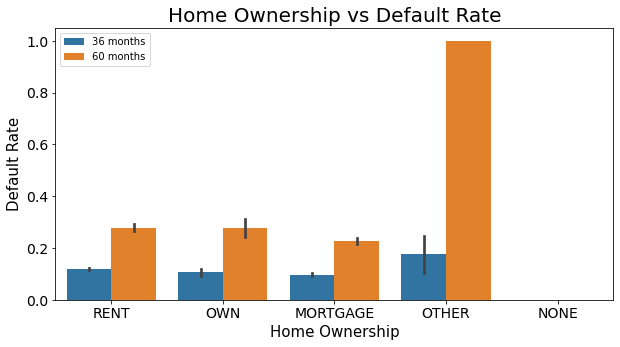

In [90]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='home_ownership', y='default', hue='term', estimator=np.mean)
plt.title('Home Ownership vs Default Rate', fontsize = 20)
plt.xlabel('Home Ownership', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 14)
plt.legend(loc = 'best')
plt.show()

#### Opinion: Upon a quick look at the graph above it first appears that the Applicants with Home Ownership stated as 'Other' have defaulted more than the other categories, but upon a closer look at the distribution (shown in the previous cell), we can see that categories ''OTHER and 'NONE' have contributed less than 1% to the distribution, we can ignore these categories and look for the highest among 'RENT', 'OWN' and 'MORTGAGE'. Among these 3 we can see that both RENT and OWN categories have equal default rate for 60 months and a very similar default rate for 36 months. To conclude, we do not see any significant impact to Default Rate w.r.t to Home Ownership and Term.

### Term - Debt To Income Ratio vs Default Rate

In [91]:
print(loan_subset['dti_cat'].value_counts())

Medium    18002
Low       12545
High       6997
Name: dti_cat, dtype: int64


'dti' is a numerical column, we will need to bin/categorize this column before we perform the bivariate analysis (which was already done during the univariate analysis).
The higher the percentage of Debt to Income Ratio, the more risky it is to grant the loan as it indicates that applicant has more debts than income (when dti is high)

In [92]:
# Here we are showing the percentage distribution in the dti_cat column.
100 * loan_subset['dti_cat'].value_counts()/len(loan_subset.dti_cat)

Medium   47.95
Low      33.41
High     18.64
Name: dti_cat, dtype: float64

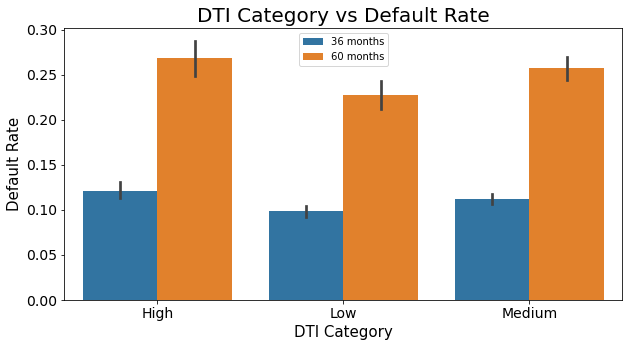

In [93]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='dti_cat', y='default', hue='term', estimator=np.mean)
plt.title('DTI Category vs Default Rate', fontsize = 20)
plt.xlabel('DTI Category', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 14)
plt.legend(loc = 'best')
plt.show()

#### Opinion: We can infer from the above plot that majority of the defaults happened when DTI is High, followed by Medium for the term of 60 months. The difference between default rates for High and Medium DTIs is small. We can observe the same trend as above for the 36 month Term applicants as well.

### Term - Purpose vs Default Rate

In [94]:
# Check the distribution of employee length
loan_subset['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [95]:
# Percentage distribution
(loan_subset['purpose'].value_counts() / loan_subset['purpose'].value_counts().sum()) * 100

debt_consolidation   47.08
credit_card          13.05
other                 9.89
home_improvement      7.42
major_purchase        5.54
small_business        4.55
car                   3.86
wedding               2.43
medical               1.75
moving                1.47
house                 0.94
vacation              0.93
educational           0.84
renewable_energy      0.25
Name: purpose, dtype: float64

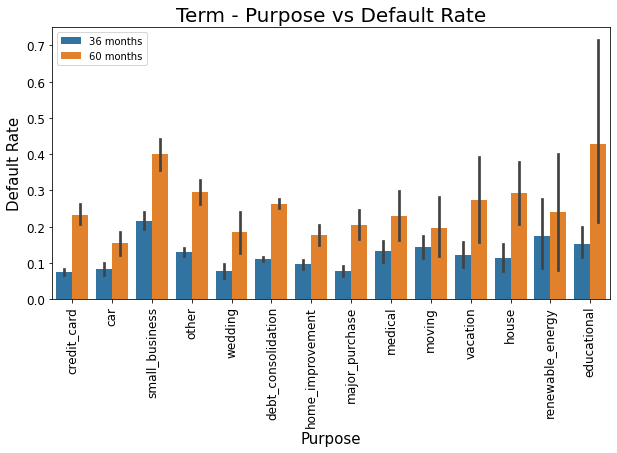

In [96]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='purpose', y='default', hue='term', estimator=np.mean)
plt.title('Term - Purpose vs Default Rate', fontsize = 20)
plt.xlabel('Purpose', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.xticks(rotation = 90)
plt.show()

#### We should ignore the wedding, medical, moving, house, vacation, educational, renewable_energy types of purpose because their contribution is very less within the distribution.
#### Opinion: Small business in 60 months terms has the highest default rate followed by other and debt consolidation. The same trend is observed in the 36 months Term as well.


### Term - Annual Income vs Default Rate

In [97]:
# Check the distribution of Annual Income
loan_subset['annual_inc_cat'].value_counts()

Medium    17433
Low       14678
High       5433
Name: annual_inc_cat, dtype: int64

In [98]:
# Percentage distribution
(loan_subset['annual_inc_cat'].value_counts() / loan_subset['annual_inc_cat'].value_counts().sum()) * 100

Medium   46.43
Low      39.10
High     14.47
Name: annual_inc_cat, dtype: float64

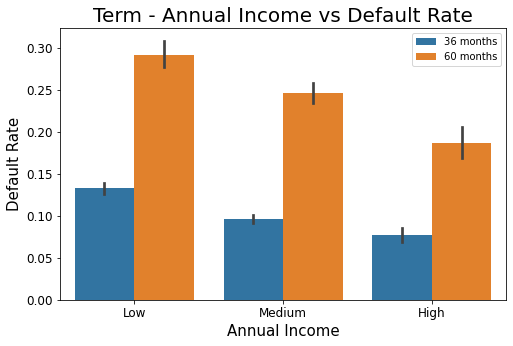

In [99]:
plt.figure(figsize=[8, 5])
sns.barplot(data=loan_subset, x='annual_inc_cat', y='default', hue='term', estimator=np.mean)
plt.title('Term - Annual Income vs Default Rate', fontsize = 20)
plt.xlabel('Annual Income', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

'Low': < 50000<br> 
'Medium': 50000 to 100000<br> 
'High': > 100000<br>

#### Opinion: Lower annual income in 60 month terms having more default rate. The same can be observed among the 36 month Term as well.

### Term - Grade vs Default Rate

In [100]:
# Check the distribution of Grade
loan_subset['grade'].value_counts()

B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

In [101]:
# Here we are showing the percentage distribution in the grade column.
100 * loan_subset['grade'].value_counts()/len(loan_subset.grade)

B   30.26
A   25.73
C   20.43
D   13.26
E    6.98
F    2.55
G    0.79
Name: grade, dtype: float64

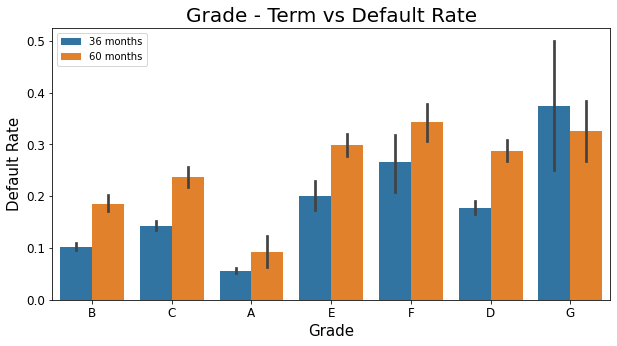

In [102]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='grade', y='default', hue='term', estimator=np.mean)
plt.title('Grade - Term vs Default Rate', fontsize = 20)
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### We should ignore the F and G grade because their contribution is very less within the distribution.
#### Opinion: E has more default rate in the 60 months terms than other grade. The same trend can be observed among the 36 month Term applicants as well.

### Term - Sub Grade vs Default Rate

In [103]:
# Check the distribution of Sub Grade
loan_subset['sub_grade'].value_counts()

A4    2792
B3    2746
A5    2634
B5    2559
B4    2388
C1    2014
B2    1944
C2    1899
A3    1741
B1    1722
C3    1458
A2    1441
D2    1255
C4    1176
C5    1122
D3    1090
A1    1052
D1     916
D4     905
D5     813
E1     711
E2     605
E3     504
E4     419
E5     381
F1     301
F2     228
F3     172
F4     148
F5     110
G1      93
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [104]:
# Here we are showing the percentage distribution in the sub grade column.
100 * loan_subset['sub_grade'].value_counts()/len(loan_subset.sub_grade)

A4   7.44
B3   7.31
A5   7.02
B5   6.82
B4   6.36
C1   5.36
B2   5.18
C2   5.06
A3   4.64
B1   4.59
C3   3.88
A2   3.84
D2   3.34
C4   3.13
C5   2.99
D3   2.90
A1   2.80
D1   2.44
D4   2.41
D5   2.17
E1   1.89
E2   1.61
E3   1.34
E4   1.12
E5   1.01
F1   0.80
F2   0.61
F3   0.46
F4   0.39
F5   0.29
G1   0.25
G2   0.21
G4   0.14
G3   0.12
G5   0.08
Name: sub_grade, dtype: float64

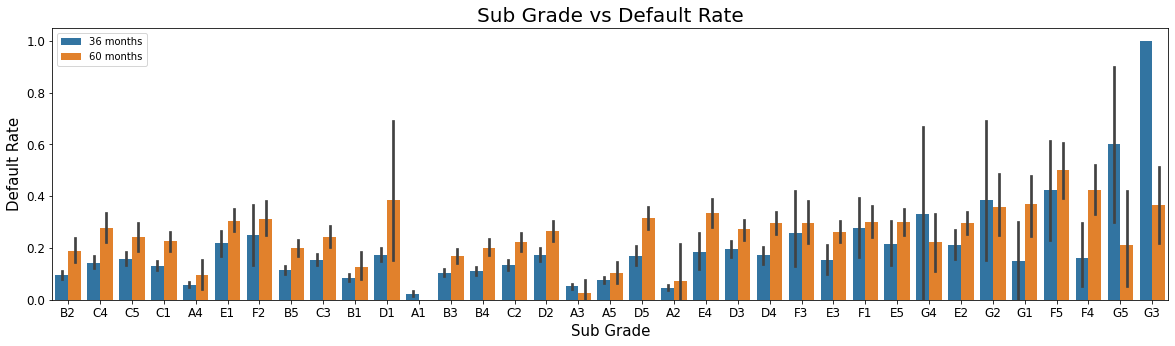

In [105]:
plt.figure(figsize=[20, 5])
sns.barplot(data=loan_subset, x='sub_grade', y='default', hue='term', estimator=np.mean)
plt.title('Sub Grade vs Default Rate', fontsize = 20)
plt.xlabel('Sub Grade', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

Note: We can ignore G subgrades here because their percentage of contribution is significantly less than that of other sub grades.
#### Opinion: F5 sub grade in 60 months terms has more default rate than other category.  The same trend is observed for the 36 month term as well.

### Term - Employment Length vs Default Rate

In [106]:
# Check the distribution of Employment Length
loan_subset['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [107]:
# Here we are showing the percentage distribution in the Employment Length column.
100 * loan_subset['emp_length'].value_counts()/len(loan_subset.emp_length)

10+ years   22.61
< 1 year    12.01
2 years     11.43
3 years     10.69
4 years      8.90
5 years      8.51
1 year       8.44
6 years      5.77
7 years      4.56
8 years      3.82
9 years      3.27
Name: emp_length, dtype: float64

In [108]:
# We can make use of the binned Employment Length Column (that we have derived during the Univariate Analysis) for the bivariate analysis as well
# Printing the percentage distribution
(loan_subset['emp_length_cat'].value_counts() / loan_subset['emp_length_cat'].value_counts().sum()) * 100

0 - 4   51.46
8+      25.87
5 - 8   22.66
Name: emp_length_cat, dtype: float64

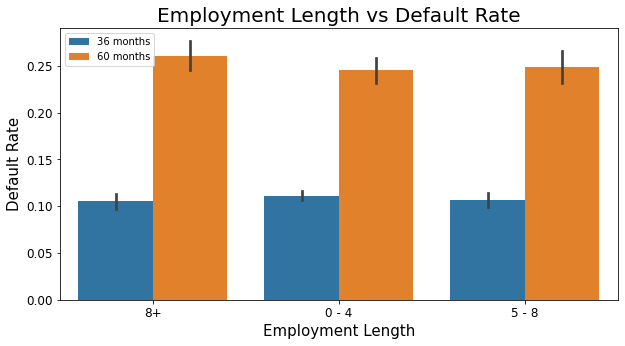

In [109]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='emp_length_cat', y='default', hue='term', estimator=np.mean)
plt.title('Employment Length vs Default Rate', fontsize = 20)
plt.xlabel('Employment Length', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Opinion: 8+ years of Employment Length for the 60 month term has the highest default, however, as we can notice from the plot, the difference in the default rates for the 8+ and the other categories, is very small and mostly insignificant. It would probably be better to not choose Employment Length and Term combination as a driving factor for deciding on the Default Rates. The same trend can be noticed for 36 month Term as well.

### Term - Interest Rate vs Default Rate

In [110]:
loan_subset['int_rate'].value_counts()

10.99    891
11.49    766
7.51     756
13.49    736
7.88     701
        ... 
16.71      1
21.48      1
18.72      1
17.34      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [111]:
# Check the percentage distribution
100 * loan_subset['int_rate'].value_counts()/len(loan_subset['int_rate'])

10.99   2.37
11.49   2.04
7.51    2.01
13.49   1.96
7.88    1.87
        ... 
16.71   0.00
21.48   0.00
18.72   0.00
17.34   0.00
22.64   0.00
Name: int_rate, Length: 370, dtype: float64

In [112]:
# For ease of analysis, we will be using interest rate categorical column that we derived in the Univariate Analysis Section
# Check the distribution of Interest Rate Category
loan_subset['int_rate_cat'].value_counts()

Medium      17880
Low         11834
High         7070
Veryhigh      760
Name: int_rate_cat, dtype: int64

In [113]:
# Check the percentage distribution
100 * loan_subset['int_rate_cat'].value_counts()/len(loan_subset['int_rate_cat'])

Medium     47.62
Low        31.52
High       18.83
Veryhigh    2.02
Name: int_rate_cat, dtype: float64

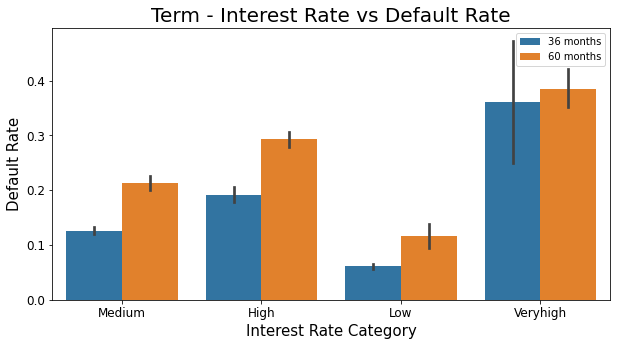

In [114]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='int_rate_cat', y='default', hue='term', estimator=np.mean)
plt.title('Term - Interest Rate vs Default Rate', fontsize = 20)
plt.xlabel('Interest Rate Category', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

'Low': < 10%<br>
'Medium': 10% to 15%<br> 
'High': 15% to 20%<br> 
'Veryhigh': > 20%<br>

##### Note: We will be ignoring Very High for this analysis as its contribution is only around 2%. 
#### Opinion: We can see from the above plot that most of the defaults have taken place when the interest rate is High, for both 36 and 60 month terms.

This concludes the BiVariate Analysis between Term and the Other important variables.<br> 
##### Takeaways from this analysis:
1) Applicants with 60 months term have defaulted more than the 36 months term. However, the trend detailed below can be observed for the 36 months term as well, albeit in lower default rates.<br>
2) `Loan Amount` - Category High has the highest default among the important categories, but the difference between different categories is very small.<br>
3) `Issued Month` - December has the highest default rates, with September and November closely following. However, the difference between these columns is very low.<br>
4) `Verification Status` - Category Source Verified has the highest default rate, with Verified as the second highest. The difference between the two categories is very small.<br>
5) `Verification Status` - Categories Rent and Own have the highest default rate. Both these categories have the same default rates.<br>
6) `DTI` - Category High has a slightly higher default rate than Medium.<br>
7) `Purpose` - Small Business has the highest default rate.<br>
8) `Annual Income` - Annual Income Low has the highest default rate.<br>
9) `Grade` - E has the highest default rate.<br>
10) `Subgrade` - F5 has the highest default rate.<br>
11) `Employement Length` - 8+ years of Employment length has the highest default rate, but the difference between the categories is very small.<br>
12) `Interest Rate` - High has the highest default rate.<br>

### Bivariate Analysis with Loan Amount as Hue:

#### Loan Amount - Interest Rate vs Default Rate

In [115]:
# Perentage Distribution for Loan Amount
(loan_subset['loan_amnt_cat'].value_counts()/loan_subset['loan_amnt_cat'].value_counts().sum())*100

Very low   36.60
Low        34.66
Medium     18.42
High        7.33
Veryhigh    2.99
Name: loan_amnt_cat, dtype: float64

##### For all intents and purposes we will ignore Very High Loan Amount during our analysis as its contribution is very less (can be seen above).

In [116]:
loan_subset['int_rate'].value_counts()

10.99    891
11.49    766
7.51     756
13.49    736
7.88     701
        ... 
16.71      1
21.48      1
18.72      1
17.34      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [117]:
# Check the percentage distribution
100 * loan_subset['int_rate'].value_counts()/len(loan_subset['int_rate'])

10.99   2.37
11.49   2.04
7.51    2.01
13.49   1.96
7.88    1.87
        ... 
16.71   0.00
21.48   0.00
18.72   0.00
17.34   0.00
22.64   0.00
Name: int_rate, Length: 370, dtype: float64

In [118]:
# For ease of analysis, we will be using interest rate categorical column that we derived in the Univariate Analysis Section
# Check the distribution of Interest Rate Category
loan_subset['int_rate_cat'].value_counts()

Medium      17880
Low         11834
High         7070
Veryhigh      760
Name: int_rate_cat, dtype: int64

In [119]:
# Check the percentage distribution
100 * loan_subset['int_rate_cat'].value_counts()/len(loan_subset['int_rate_cat'])

Medium     47.62
Low        31.52
High       18.83
Veryhigh    2.02
Name: int_rate_cat, dtype: float64

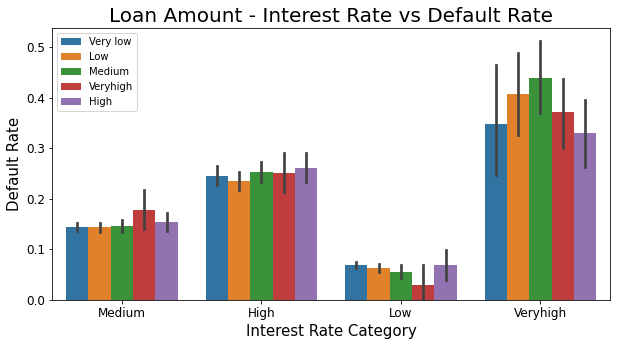

In [120]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='int_rate_cat', y='default', hue='loan_amnt_cat', estimator=np.mean)
plt.title('Loan Amount - Interest Rate vs Default Rate', fontsize = 20)
plt.xlabel('Interest Rate Category', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Loan Amount:
'Very low': < 7000<br> 
'Low': 7000 to 14000<br>
'Medium': 14000 to 21000<br>
'High': 21000 to 28000<br>
'Very High': > 28000

##### Interest Rate:<br>
'Low': < 10%<br>
'Medium': 10% to 15%<br> 
'High': 15% to 20%<br> 
'Veryhigh': > 20%<br>

##### Note: Category Very High will be ignored as it's contribution is only 2% as seen from the previous cell
##### Opinion: Category High of the Interest Rate for the High Loan Amount has the highest default rate. But as we can see from the above graph, the difference between various categories of Loan Amount is quite small.

#### Loan Amount - Grade vs Default Rate

In [121]:
loan_subset['grade'].value_counts()

B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

In [122]:
# Check the percentage distribution
100 * loan_subset['grade'].value_counts()/len(loan_subset['grade'])

B   30.26
A   25.73
C   20.43
D   13.26
E    6.98
F    2.55
G    0.79
Name: grade, dtype: float64

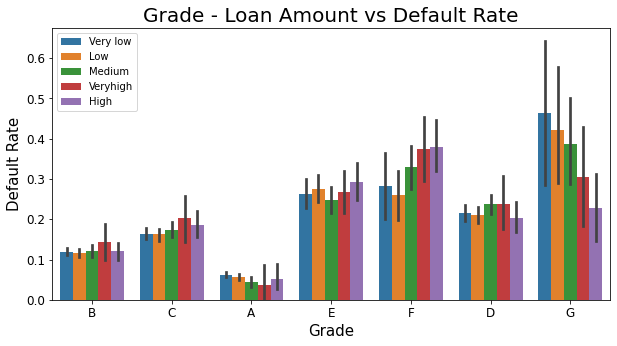

In [123]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='grade', y='default', hue='loan_amnt_cat', estimator=np.mean)
plt.title('Grade - Loan Amount vs Default Rate', fontsize = 20)
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Loan Amount:
Very low: < 7000<br> 
Low: 7000 to 14000<br>
Medium: 14000 to 21000<br>
High: 21000 to 28000<br>
Very High: > 28000

##### Note: Grades F and G will be ignored as their contribution is very less to the distribution as shown in the previous cell.
##### Opinion: Grade E has the highest default rate for Loan Amount Category High. 

#### Loan Amount - Annual Income vs Default Rate

In [124]:
loan_subset['annual_inc_cat'].value_counts()

Medium    17433
Low       14678
High       5433
Name: annual_inc_cat, dtype: int64

In [125]:
# Percentage of distribution
(loan_subset['annual_inc_cat'].value_counts() / loan_subset['annual_inc_cat'].value_counts().sum()) * 100

Medium   46.43
Low      39.10
High     14.47
Name: annual_inc_cat, dtype: float64

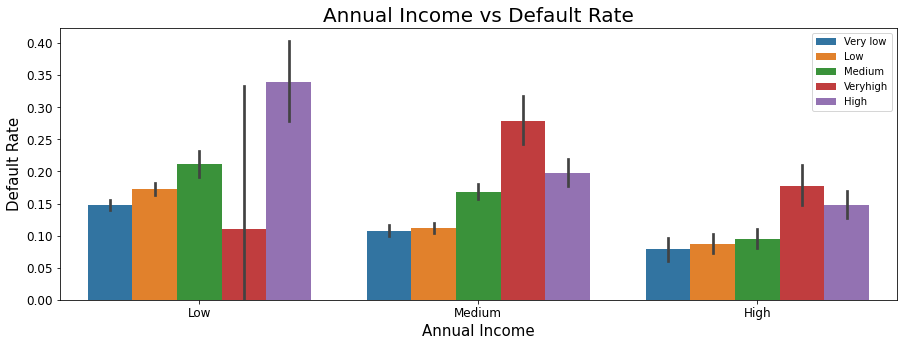

In [126]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='annual_inc_cat', y='default', hue='loan_amnt_cat', estimator=np.mean)
plt.title('Annual Income vs Default Rate', fontsize = 20)
plt.xlabel('Annual Income', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Loan Amount:
'Very low': < 7000<br>
'Low': 7000 to 14000<br>
'Medium': 14000 to 21000<br>
'High': 21000 to 28000<br>
'Very High': > 28000<br>

##### Annual  Income:
'Low': < 50000<br> 
'Medium': 50000 to 100000<br> 
'High': > 100000<br>

##### Opinion: Annual Income Category Low when  Loan Amount is High has the highest default rate

#### Loan Amount - Purpose vs Default Rate

In [127]:
loan_subset['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [128]:
# Percentage of distribution
(loan_subset['purpose'].value_counts() / loan_subset['purpose'].value_counts().sum()) * 100

debt_consolidation   47.08
credit_card          13.05
other                 9.89
home_improvement      7.42
major_purchase        5.54
small_business        4.55
car                   3.86
wedding               2.43
medical               1.75
moving                1.47
house                 0.94
vacation              0.93
educational           0.84
renewable_energy      0.25
Name: purpose, dtype: float64

We can only consider the first 7 categories of the 'Purpose' column as the rest have a very low percentage contributions 

In [129]:
# For the purpose clarity in the plot, we will be creating a temp dataframe and use that for our plotting
temp_dataset = loan_subset[~(loan_subset['purpose'].isin(['wedding', 'medical', 'moving', 'house', 'vacation', 'educational', 'renewable_energy']))]
(temp_dataset['purpose'].value_counts() / temp_dataset['purpose'].value_counts().sum()) * 100

debt_consolidation   51.52
credit_card          14.28
other                10.82
home_improvement      8.12
major_purchase        6.06
small_business        4.98
car                   4.22
Name: purpose, dtype: float64

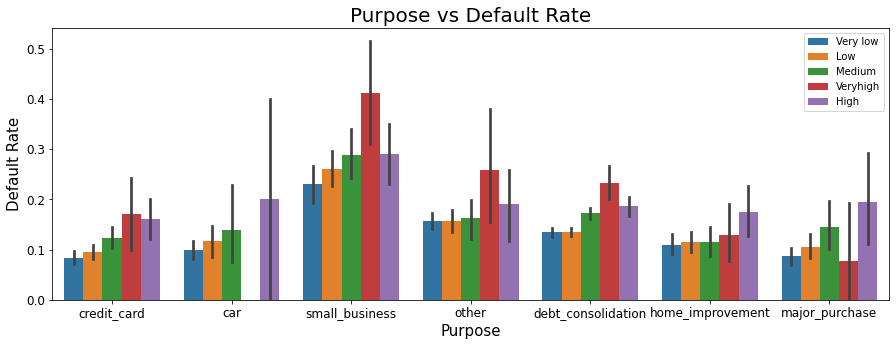

In [130]:
plt.figure(figsize=[15, 5])
sns.barplot(data=temp_dataset, x='purpose', y='default', hue='loan_amnt_cat', estimator=np.mean)
plt.title('Purpose vs Default Rate', fontsize = 20)
plt.xlabel('Purpose', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Loan Amount:
'Very low': < 7000<br>
'Low': 7000 to 14000<br>
'Medium': 14000 to 21000<br>
'High': 21000 to 28000<br>
'Very High': > 28000<br>

##### Note: We have only considered the first 7 categories as mentioned in the above cell and plotted  a graph only for those 7 cells. 
##### Opinion: Small Business has the highest default rate, equally for both High and Medium Loan Amount Categories

#### Loan Amount - Employee Length vs Default Rate

In [131]:
loan_subset['emp_length_cat'].value_counts()

0 - 4    19322
8+        9714
5 - 8     8508
Name: emp_length_cat, dtype: int64

In [132]:
# Percentage of distribution
(loan_subset['emp_length_cat'].value_counts() / loan_subset['emp_length_cat'].value_counts().sum()) * 100

0 - 4   51.46
8+      25.87
5 - 8   22.66
Name: emp_length_cat, dtype: float64

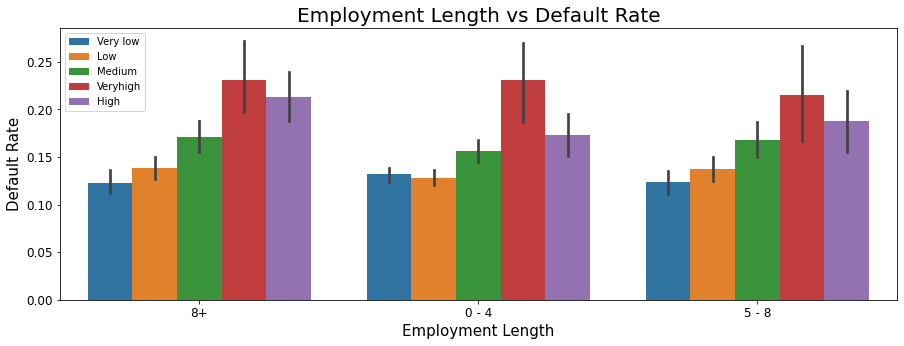

In [133]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='emp_length_cat', y='default', hue='loan_amnt_cat', estimator=np.mean)
plt.title('Employment Length vs Default Rate', fontsize = 20)
plt.xlabel('Employment Length', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Loan Amount:
'Very low': < 7000<br>
'Low': 7000 to 14000<br>
'Medium': 14000 to 21000<br>
'High': 21000 to 28000<br>
'Very High': > 28000<br>

##### Note: As mentioned in the beginning of the Loan Amount analysis, we will be ignoring Loan Amount Category, 'Very High' for our analysis as it constitutes to a very low percentage.
##### Opinion: 8+ years of Employment Length has the higest default rate when the Loan Amount category is High

#### Loan Amount - DTI vs Default Rate

In [134]:
loan_subset['dti_cat'].value_counts()

Medium    18002
Low       12545
High       6997
Name: dti_cat, dtype: int64

In [135]:
# Percentage of distribution
(loan_subset['dti_cat'].value_counts() / loan_subset['dti_cat'].value_counts().sum()) * 100

Medium   47.95
Low      33.41
High     18.64
Name: dti_cat, dtype: float64

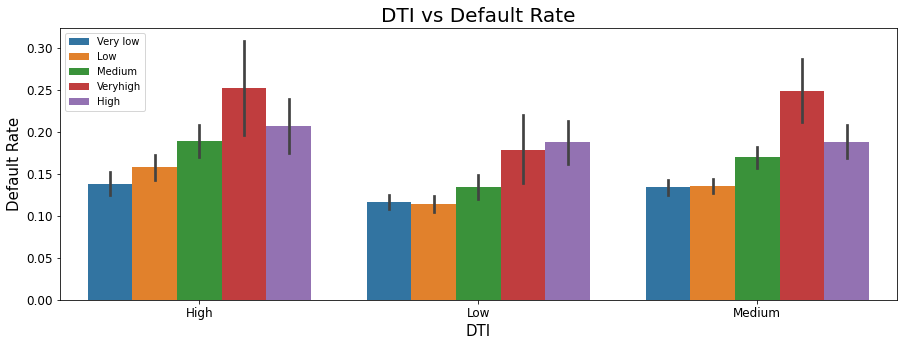

In [136]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='dti_cat', y='default', hue='loan_amnt_cat', estimator=np.mean)
plt.title('DTI vs Default Rate', fontsize = 20)
plt.xlabel('DTI', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Loan Amount:
'Very low': < 7000<br>
'Low': 7000 to 14000<br>
'Medium': 14000 to 21000<br>
'High': 21000 to 28000<br>
'Very High': > 28000<br>

##### DTI:
'Low': <= 10<br> 
'Medium': 10 to 20<br> 
'High': > 20<br>

##### Opinion: Higher the DTI higher the Default Rate. High DTI has the highest default rate for High Loan Amount,  however the difference between the top categories of DTI  and Loan Amount is quite less.

#### Loan Amount - Interest Rate vs Default Rate

In [268]:
loan_subset.int_rate_cat.value_counts()

Medium      17880
Low         11834
High         7070
Veryhigh      760
Name: int_rate_cat, dtype: int64

In [269]:
# Percentage of distribution
(loan_subset['int_rate_cat'].value_counts() / loan_subset['int_rate_cat'].value_counts().sum()) * 100

Medium     47.62
Low        31.52
High       18.83
Veryhigh    2.02
Name: int_rate_cat, dtype: float64

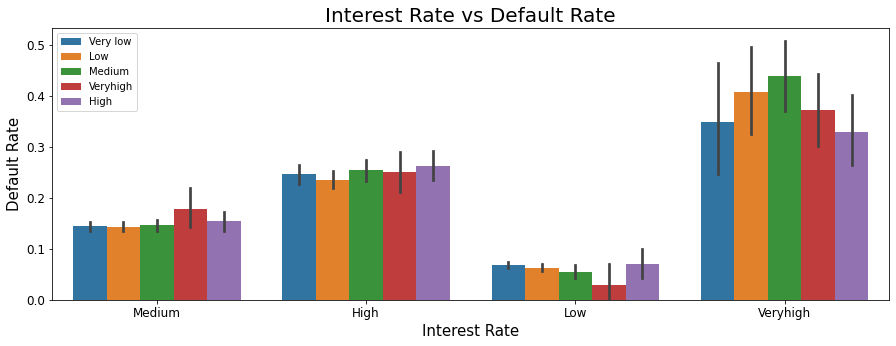

In [137]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='int_rate_cat', y='default', hue='loan_amnt_cat', estimator=np.mean)
plt.title('Interest Rate vs Default Rate', fontsize = 20)
plt.xlabel('Interest Rate', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Loan Amount:
- 'Very low': < 7000
- 'Low': 7000 to 14000
- 'Medium': 14000 to 21000
- 'High': 21000 to 28000
- 'Very High': > 28000

#### Interest Rate Category
- Low (<= 10%)
- Medium (10% to 15%)
- High (15% to 20%)
- Veryhigh (>20%)

##### Opinion: Upon ignoring the Interest Rate of Very High, we can see that Interest Rate High has the highest default rate for a high loan amount

#### Loan Amount - Home Ownership vs Default Rate

In [138]:
loan_subset['home_ownership'].value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [139]:
# Percentage of distribution
(loan_subset['home_ownership'].value_counts() / loan_subset['home_ownership'].value_counts().sum()) * 100

RENT       48.15
MORTGAGE   44.20
OWN         7.38
OTHER       0.26
NONE        0.01
Name: home_ownership, dtype: float64

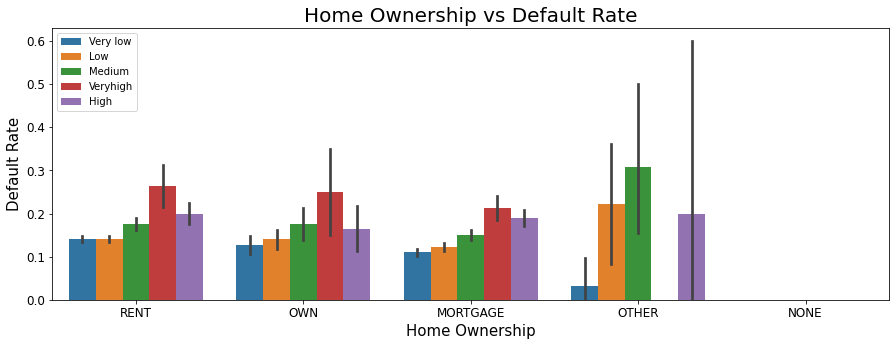

In [140]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='home_ownership', y='default', hue='loan_amnt_cat', estimator=np.mean)
plt.title('Home Ownership vs Default Rate', fontsize = 20)
plt.xlabel('Home Ownership', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Loan Amount:
'Very low': < 7000<br>
'Low': 7000 to 14000<br>
'Medium': 14000 to 21000<br>
'High': 21000 to 28000<br>
'Very High': > 28000<br>

##### Note: As seen in the percentage of distributions, categories Other and None contribute less than 1%, hence will be ignored
##### Opinion:  Category Rent has the highest Default rate for the Loan Amount High (Very High will be ignored as stated at the beginning), with Mortgage being the second.  However, the difference between the two is very less

#### Loan Amount - Verification Status vs Default Rate

In [141]:
loan_subset['verification_status'].value_counts()

Not Verified       16278
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64

In [142]:
# Percentage of distribution
(loan_subset['verification_status'].value_counts() / loan_subset['verification_status'].value_counts().sum()) * 100

Not Verified      43.36
Verified          31.36
Source Verified   25.29
Name: verification_status, dtype: float64

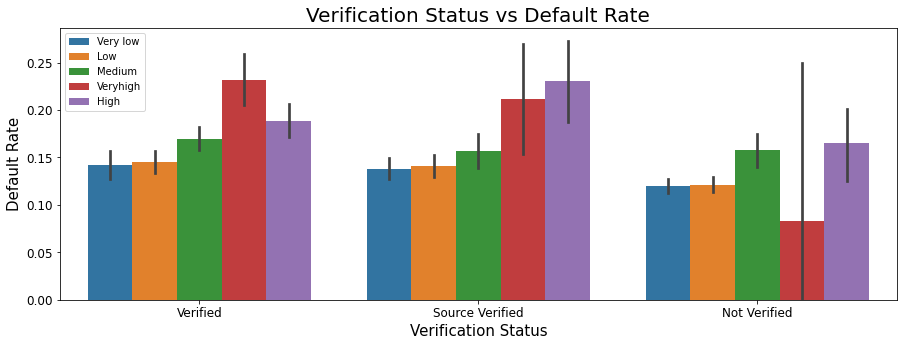

In [143]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='verification_status', y='default', hue='loan_amnt_cat', estimator=np.mean)
plt.title('Verification Status vs Default Rate', fontsize = 20)
plt.xlabel('Verification Status', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Loan Amount:
'Very low': < 7000<br>
'Low': 7000 to 14000<br>
'Medium': 14000 to 21000<br>
'High': 21000 to 28000<br>
'Very High': > 28000<br>

##### Opinion:  Category Source Verified has the highest Default rate for the Loan Amount High (Very High will be ignored as stated at the beginning).

This concludes the Bivariate Analysis of Loan Amount and other Variables vs Default Rate<br>
Key takeaways:
1) `Interest Rate` - Category High of the Interest Rate for the High Loan Amount has the highest default rate. But as we can see from the above graph, the difference between various categories of Loan Amount is quite small.<br>
2) `Grade` - Grade E has the highest default rate with loan amount category High<br>
3) `Subgrade` - <br>
4) `Annual Income` - Annual Income Category Low when  Loan Amount is High has the highest default rate<br>
5) `Purpose` - Small Business has the highest default rate, equally for both High and Medium Loan Amount Categories.<br>
6) `Employment Length` - 8+ years of Employment Length has the higest default rate when the Loan Amount category is High.<br>
7) `DTI` - Higher the DTI higher the Default Rate. High DTI has the highest default rate for High Loan Amount,  however the difference between the top categories of DTI  and Loan Amount is quite less.<br>
8) `Issued Month` - <br>
9) `Home Ownership` - Category Rent has the highest Default rate for the Loan Amount High with Mortgage being the second.  However, the difference between the 2 is very less<br>
10) `Verification Status`: Category Source Verified has the highest Default rate for the Loan Amount High.<br>

### Bivariate Analysis with Interest Rate as Hue:

In [144]:
loan_subset['int_rate_cat'].value_counts()

Medium      17880
Low         11834
High         7070
Veryhigh      760
Name: int_rate_cat, dtype: int64

In [145]:
(loan_subset['int_rate_cat'].value_counts() /  loan_subset['int_rate_cat'].value_counts().sum()) * 100

Medium     47.62
Low        31.52
High       18.83
Veryhigh    2.02
Name: int_rate_cat, dtype: float64

##### Note: The percentage of contribution of the category Very High is very less, and for all intents and purposes we will be ignoring this category for the rest of the analysis.

#### Interest Rate - Grade vs Default Rate

In [146]:
loan_subset['grade'].value_counts()

B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

In [147]:
# Percentage of distribution
(loan_subset['grade'].value_counts() / loan_subset['grade'].value_counts().sum()) * 100

B   30.26
A   25.73
C   20.43
D   13.26
E    6.98
F    2.55
G    0.79
Name: grade, dtype: float64

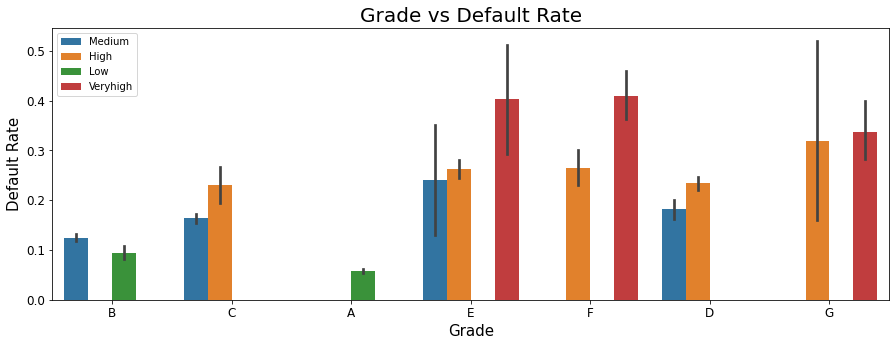

In [148]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='grade', y='default', hue='int_rate_cat', estimator=np.mean)
plt.title('Grade vs Default Rate', fontsize = 20)
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Interest Rate:<br>
'Low': < 10%<br>
'Medium': 10% to 15%<br> 
'High': 15% to 20%<br> 
'Veryhigh': > 20%<br>

##### Note: Categories F and G will be ignored from the Grade variable as they contribute a very less percentage to the overall distribution
##### Opinion: Grade E has the highest default rate for High Interest Rate

#### Interest Rate - Annual Income vs Default Rate

In [149]:
loan_subset['annual_inc_cat'].value_counts()

Medium    17433
Low       14678
High       5433
Name: annual_inc_cat, dtype: int64

In [150]:
# Percentage of distribution
(loan_subset['annual_inc_cat'].value_counts() / loan_subset['annual_inc_cat'].value_counts().sum()) * 100

Medium   46.43
Low      39.10
High     14.47
Name: annual_inc_cat, dtype: float64

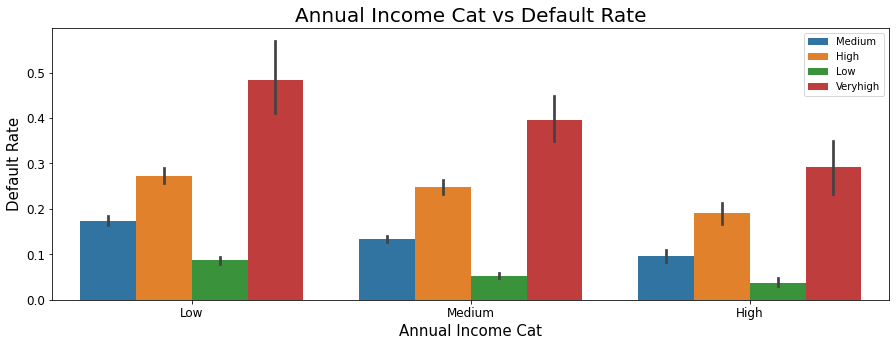

In [151]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='annual_inc_cat', y='default', hue='int_rate_cat', estimator=np.mean)
plt.title('Annual Income Cat vs Default Rate', fontsize = 20)
plt.xlabel('Annual Income Cat', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Interest Rate:<br>
'Low': < 10%<br>
'Medium': 10% to 15%<br> 
'High': 15% to 20%<br> 
'Veryhigh': > 20%<br>

##### Annual  Income:
'Low': < 50000<br> 
'Medium': 50000 to 100000<br> 
'High': > 100000<br>

##### Opinion: Annual Income Category Low has the highest default rate for High Interest Rate. But the difference between categories Low and Medium of the Annual Income variable, is very small.

#### Interest Rate - Purpose vs Default Rate

In [152]:
loan_subset['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [153]:
# Percentage of distribution
(loan_subset['purpose'].value_counts() / loan_subset['purpose'].value_counts().sum()) * 100

debt_consolidation   47.08
credit_card          13.05
other                 9.89
home_improvement      7.42
major_purchase        5.54
small_business        4.55
car                   3.86
wedding               2.43
medical               1.75
moving                1.47
house                 0.94
vacation              0.93
educational           0.84
renewable_energy      0.25
Name: purpose, dtype: float64

We can only consider the first 7 categories of the 'Purpose' column as the rest have a very low percentage contributions 

In [154]:
# For the purpose clarity in the plot, we will be making use of the temp_dataset that we created in the previous analysis
(temp_dataset['purpose'].value_counts() / temp_dataset['purpose'].value_counts().sum()) * 100

debt_consolidation   51.52
credit_card          14.28
other                10.82
home_improvement      8.12
major_purchase        6.06
small_business        4.98
car                   4.22
Name: purpose, dtype: float64

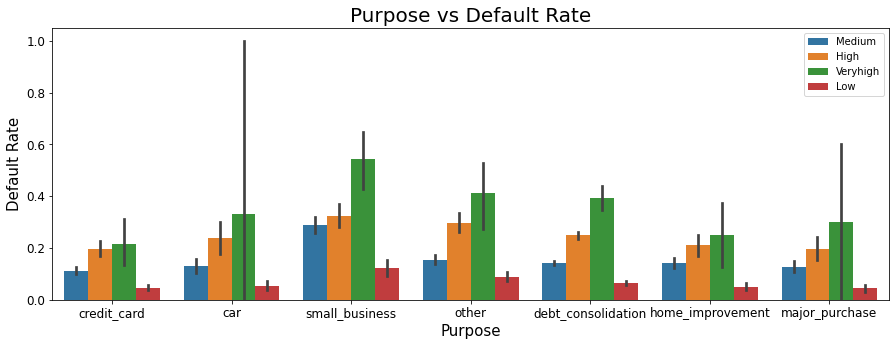

In [155]:
plt.figure(figsize=[15, 5])
sns.barplot(data=temp_dataset, x='purpose', y='default', hue='int_rate_cat', estimator=np.mean)
plt.title('Purpose vs Default Rate', fontsize = 20)
plt.xlabel('Purpose', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Interest Rate:<br>
'Low': < 10%<br>
'Medium': 10% to 15%<br> 
'High': 15% to 20%<br> 
'Veryhigh': > 20%<br>

##### Opinion: Purpose Category small_business has the highest default rate for High Interest Rate. But the difference between categories small_business and other of the Purpose variable, is very small.

#### Interest Rate - Employment Length vs Default Rate

In [156]:
loan_subset['emp_length_cat'].value_counts()

0 - 4    19322
8+        9714
5 - 8     8508
Name: emp_length_cat, dtype: int64

In [157]:
(loan_subset['emp_length_cat'].value_counts() / loan_subset['emp_length_cat'].value_counts().sum()) * 100

0 - 4   51.46
8+      25.87
5 - 8   22.66
Name: emp_length_cat, dtype: float64

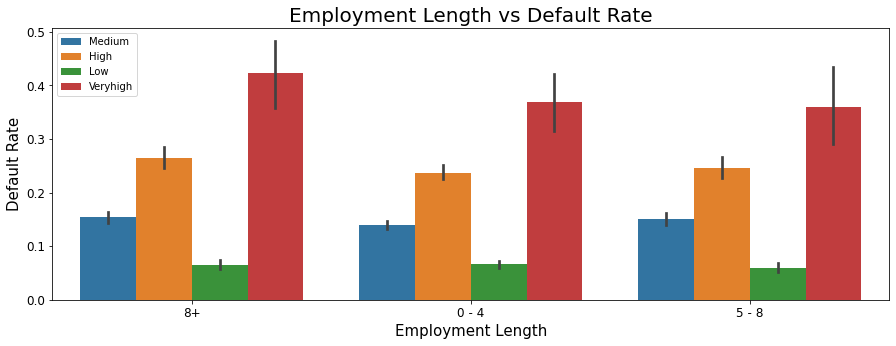

In [158]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='emp_length_cat', y='default', hue='int_rate_cat', estimator=np.mean)
plt.title('Employment Length vs Default Rate', fontsize = 20)
plt.xlabel('Employment Length', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Interest Rate:<br>
'Low': < 10%<br>
'Medium': 10% to 15%<br> 
'High': 15% to 20%<br> 
'Veryhigh': > 20%<br>

##### Opinion: Employment Length of 8+ years has the highest default rate for High Interest Rate, however, the difference between 8+ years and the other categories is very small.

#### Interest Rate - DTI vs Default Rate

In [159]:
loan_subset['dti_cat'].value_counts()

Medium    18002
Low       12545
High       6997
Name: dti_cat, dtype: int64

In [160]:
(loan_subset['dti_cat'].value_counts() / loan_subset['dti_cat'].value_counts().sum()) * 100

Medium   47.95
Low      33.41
High     18.64
Name: dti_cat, dtype: float64

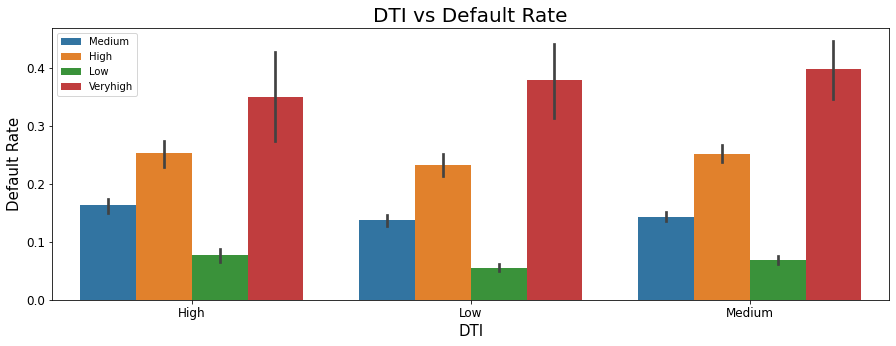

In [161]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='dti_cat', y='default', hue='int_rate_cat', estimator=np.mean)
plt.title('DTI vs Default Rate', fontsize = 20)
plt.xlabel('DTI', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Interest Rate:<br>
'Low': < 10%<br>
'Medium': 10% to 15%<br> 
'High': 15% to 20%<br> 
'Veryhigh': > 20%<br>

##### Opinion: Default rates of High and Medium DTI are the same and are little more than Low DTI for High Interest Rate.

#### Interest Rate - Issued Month vs Default Rate

In [162]:
loan_subset['issue_d_month'].value_counts()

Dec    4120
Nov    3890
Oct    3637
Sep    3394
Aug    3321
Jul    3253
Jun    3094
May    2838
Apr    2756
Mar    2632
Jan    2331
Feb    2278
Name: issue_d_month, dtype: int64

In [163]:
(loan_subset['issue_d_month'].value_counts() / loan_subset['issue_d_month'].value_counts().sum()) * 100

Dec   10.97
Nov   10.36
Oct    9.69
Sep    9.04
Aug    8.85
Jul    8.66
Jun    8.24
May    7.56
Apr    7.34
Mar    7.01
Jan    6.21
Feb    6.07
Name: issue_d_month, dtype: float64

In [164]:
(loan_subset['int_rate_cat'].value_counts() / loan_subset['int_rate_cat'].value_counts().sum()) * 100

Medium     47.62
Low        31.52
High       18.83
Veryhigh    2.02
Name: int_rate_cat, dtype: float64

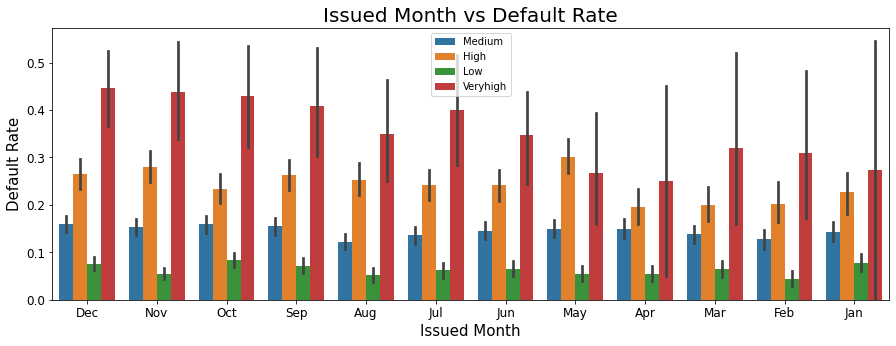

In [165]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='issue_d_month', y='default', hue='int_rate_cat', estimator=np.mean)
plt.title('Issued Month vs Default Rate', fontsize = 20)
plt.xlabel('Issued Month', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Interest Rate:
- 'Low': < 10%
- 'Medium': 10% to 15%
- 'High': 15% to 20%
- 'Veryhigh': > 20%

#### Opinion: In the month of May with High interest rate having more default rate.

#### Interest Rate - Home Ownership vs Default Rate

In [166]:
loan_subset['home_ownership'].value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [167]:
(loan_subset['home_ownership'].value_counts() / loan_subset['home_ownership'].value_counts().sum()) * 100

RENT       48.15
MORTGAGE   44.20
OWN         7.38
OTHER       0.26
NONE        0.01
Name: home_ownership, dtype: float64

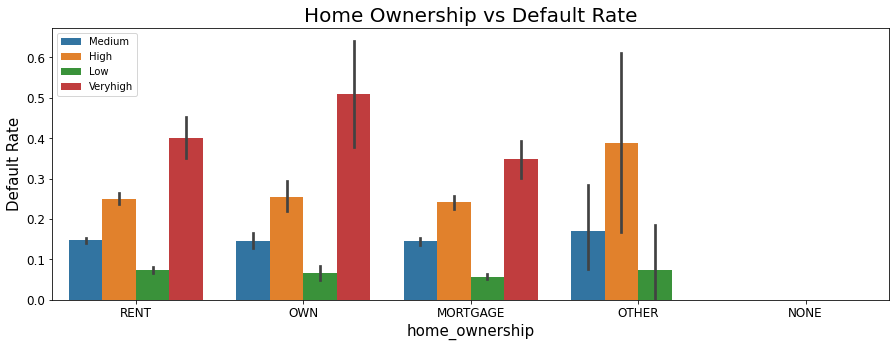

In [168]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='home_ownership', y='default', hue='int_rate_cat', estimator=np.mean)
plt.title('Home Ownership vs Default Rate', fontsize = 20)
plt.xlabel('home_ownership', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Interest Rate:<br>
'Low': < 10%<br>
'Medium': 10% to 15%<br> 
'High': 15% to 20%<br> 
'Veryhigh': > 20%<br>

##### Note: We will be ignoring the home_ownership categories - Other and None as they constitute less than 1% of the entire distribution
##### Opinion: The default rates for the 3 Home Ownership Categories 'Rent', 'Own' and 'Mortgage' are pretty similar for High Interest Rate.

#### Interest Rate - Verification Status vs Default Rate

In [169]:
loan_subset['verification_status'].value_counts()

Not Verified       16278
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64

In [170]:
(loan_subset['verification_status'].value_counts() / loan_subset['verification_status'].value_counts().sum()) * 100

Not Verified      43.36
Verified          31.36
Source Verified   25.29
Name: verification_status, dtype: float64

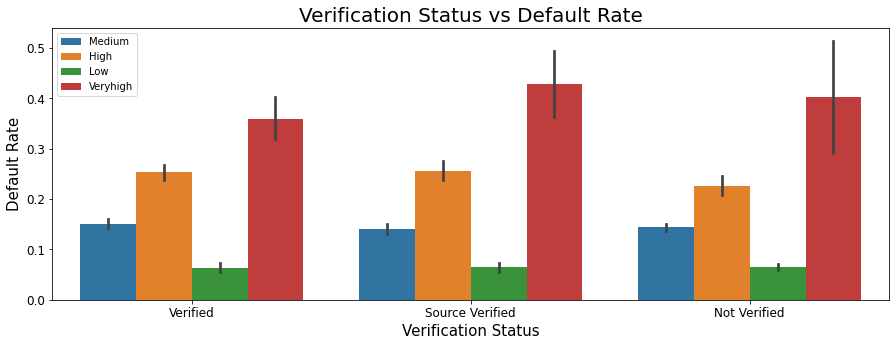

In [171]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='verification_status', y='default', hue='int_rate_cat', estimator=np.mean)
plt.title('Verification Status vs Default Rate', fontsize = 20)
plt.xlabel('Verification Status', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Interest Rate:<br>
'Low': < 10%<br>
'Medium': 10% to 15%<br> 
'High': 15% to 20%<br> 
'Veryhigh': > 20%<br>

##### Opinion: The default rates for Verified and Source Verified categories of the Verification Column are the same for High Interest Rate.

This concludes the Bivariate Analysis of Interest Rate and other Variables vs Default Rate<br>
Key takeaways:
1) `Grade` - Grade E has the highest default rate for High Interest Rate<br>
2) `Subgrade` - <br>
3) `Annual Income` - Annual Income Category Low has the highest default rate for High Interest Rate. But the difference between categories Low and Medium of the Annual Income variable, is very small.<br>
4) `Purpose` - Purpose Category small_business has the highest default rate for High Interest Rate. But the difference between categories small_business and other of the Purpose variable, is very small.<br>
5) `Employment Length` - Employment Length of 8+ years has the highest default rate for High Interest Rate, however, the difference between 8+ years and the other categories is very small.<br>
6) `DTI` - Default rates of High and Medium DTI are the same and are little more than Low DTI for High Interest Rate.<br>
7) `Issued Month` - In the month of May with High interest rate having more default rate.<br>
8) `Home Ownership` - The default rates for the 3 Home Ownership Categories 'Rent', 'Own' and 'Mortgage' are pretty similar for High Interest Rate.<br>
9) `Verification Status`: The default rates for Verified and Source Verified categories of the Verification Column are the same for High Interest Rate.<br>

### Grade - Annual Income vs Default Rate

In [172]:
loan_subset.annual_inc_cat.value_counts()

Medium    17433
Low       14678
High       5433
Name: annual_inc_cat, dtype: int64

In [173]:
(loan_subset['annual_inc_cat'].value_counts() / loan_subset['annual_inc_cat'].value_counts().sum()) * 100

Medium   46.43
Low      39.10
High     14.47
Name: annual_inc_cat, dtype: float64

In [174]:
(loan_subset['grade'].value_counts() / loan_subset['grade'].value_counts().sum()) * 100

B   30.26
A   25.73
C   20.43
D   13.26
E    6.98
F    2.55
G    0.79
Name: grade, dtype: float64

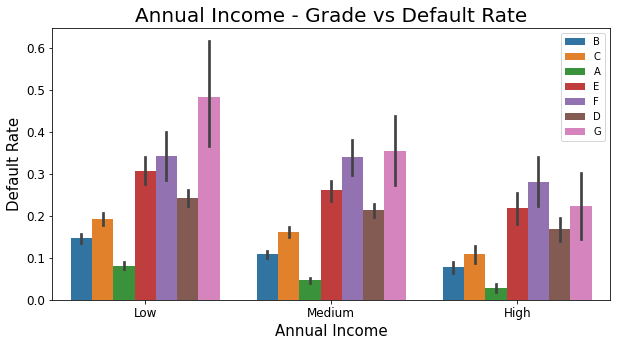

In [175]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='annual_inc_cat', y='default', hue='grade', estimator=np.mean)
plt.title('Annual Income - Grade vs Default Rate', fontsize = 20)
plt.xlabel('Annual Income', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

##### Annual  Income:
Low: < 50000<br> 
Medium: 50000 to 100000<br> 
High: > 100000<br>

#### Opinion: As we can see the contribution of F and G grade have very low. That's why we conclude that the Low annual income with E grade have more default rate

#### Annual Income - Purpose vs Default Rate:

In [176]:
loan_subset.purpose.value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [177]:
(loan_subset['purpose'].value_counts() / loan_subset['purpose'].value_counts().sum()) * 100

debt_consolidation   47.08
credit_card          13.05
other                 9.89
home_improvement      7.42
major_purchase        5.54
small_business        4.55
car                   3.86
wedding               2.43
medical               1.75
moving                1.47
house                 0.94
vacation              0.93
educational           0.84
renewable_energy      0.25
Name: purpose, dtype: float64

In [178]:
# For the purpose clarity in the plot, we will be making use of the temp_dataset that we created in the previous analysis
(temp_dataset['purpose'].value_counts() / temp_dataset['purpose'].value_counts().sum()) * 100

debt_consolidation   51.52
credit_card          14.28
other                10.82
home_improvement      8.12
major_purchase        6.06
small_business        4.98
car                   4.22
Name: purpose, dtype: float64

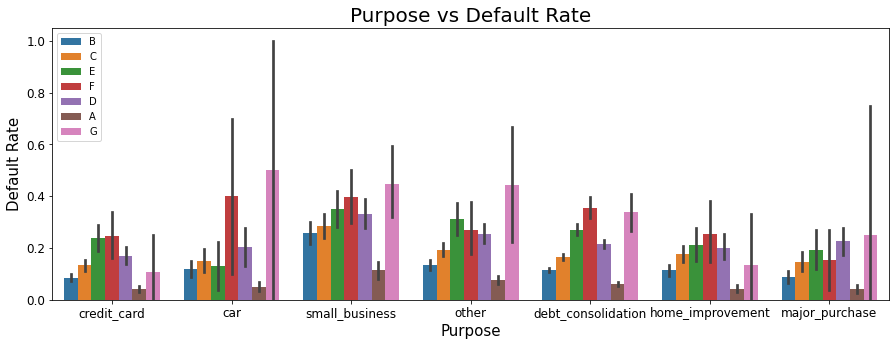

In [179]:
plt.figure(figsize=[15, 5])
sns.barplot(data=temp_dataset, x='purpose', y='default', hue='grade', estimator=np.mean)
plt.title('Purpose vs Default Rate', fontsize = 20)
plt.xlabel('Purpose', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Opinion:  As we can see the contribution of F and G grade have very low. That's why we conclude that the purpose of car and small business for E grade having the similar default rate and also higher than other purpose.

### Grade - Employment Length vs Default Rate

In [180]:
loan_subset.emp_length_cat.value_counts()

0 - 4    19322
8+        9714
5 - 8     8508
Name: emp_length_cat, dtype: int64

In [181]:
(loan_subset['emp_length_cat'].value_counts() / loan_subset['emp_length_cat'].value_counts().sum()) * 100

0 - 4   51.46
8+      25.87
5 - 8   22.66
Name: emp_length_cat, dtype: float64

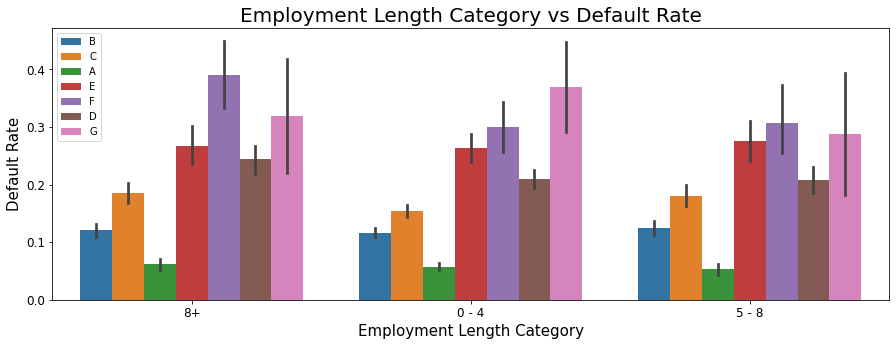

In [182]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='emp_length_cat', y='default', hue='grade', estimator=np.mean)
plt.title('Employment Length Category vs Default Rate', fontsize = 20)
plt.xlabel('Employment Length Category', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Opinion: As we can see the contribution of F and G grade have very low. That's why we conclude that the all three categories for E grade having same default rate and for D grade there are high chance of default rate in 8+ type of employment length category.

### Grade - DTI vs Default Rate

In [183]:
loan_subset.dti_cat.value_counts()

Medium    18002
Low       12545
High       6997
Name: dti_cat, dtype: int64

In [184]:
(loan_subset['dti_cat'].value_counts() / loan_subset['dti_cat'].value_counts().sum()) * 100

Medium   47.95
Low      33.41
High     18.64
Name: dti_cat, dtype: float64

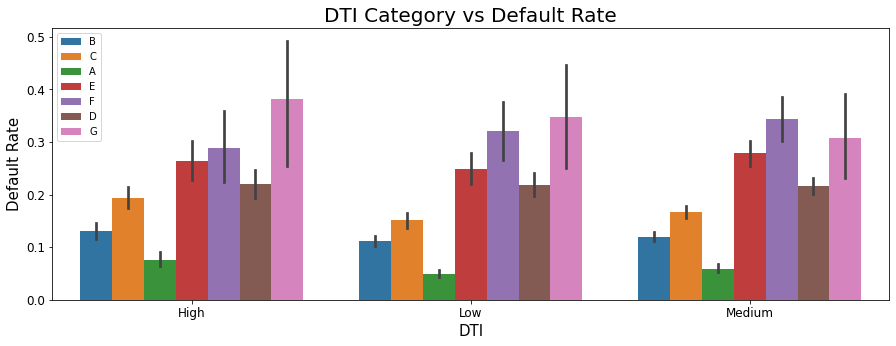

In [185]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='dti_cat', y='default', hue='grade', estimator=np.mean)
plt.title('DTI Category vs Default Rate', fontsize = 20)
plt.xlabel('DTI', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Opinion: As we can see the contribution of F and G grade have very low. That's why we conclude that there are slightly difference of default rate in high and medium dti for E grade.

### Grade - Home Ownership vs Default Rate

In [186]:
loan_subset.home_ownership.value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [187]:
(loan_subset['home_ownership'].value_counts() / loan_subset['home_ownership'].value_counts().sum()) * 100

RENT       48.15
MORTGAGE   44.20
OWN         7.38
OTHER       0.26
NONE        0.01
Name: home_ownership, dtype: float64

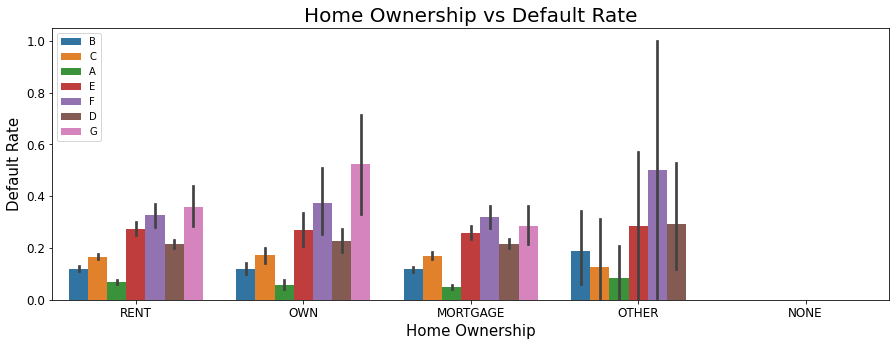

In [188]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='home_ownership', y='default', hue='grade', estimator=np.mean)
plt.title('Home Ownership vs Default Rate', fontsize = 20)
plt.xlabel('Home Ownership', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Note: We will be ignoring the home_ownership categories - Other and None as they constitute less than 1% of the entire distribution
#### Opinion: As we can see the contribution of F and G grade have very low. That's why we conclude that the default rates for the 3 Home Ownership Categories 'Rent', 'Own' and 'Mortgage' are pretty similar for E grade.

### Grade - Verification Status vs Default Rate

In [189]:
loan_subset.verification_status.value_counts()

Not Verified       16278
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64

In [190]:
(loan_subset['verification_status'].value_counts() / loan_subset['verification_status'].value_counts().sum()) * 100

Not Verified      43.36
Verified          31.36
Source Verified   25.29
Name: verification_status, dtype: float64

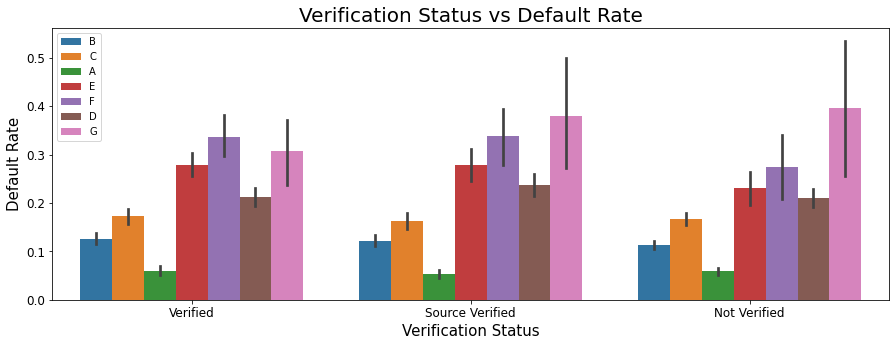

In [191]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='verification_status', y='default', hue='grade', estimator=np.mean)
plt.title('Verification Status vs Default Rate', fontsize = 20)
plt.xlabel('Verification Status', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Opinion: As we can see the contribution of F and G grade have very low. That's why we conclude that the default rates for verified and source verified have not any significant difference but also higher than not verified type of verification status.

This concludes the Bivariate Analysis of grade and other Variables vs Default Rate<br>
Key takeaways:
- As we can see the contribution of F and G grade have very low.<br>
1) `Annual Income` - The Low annual income with E grade have more default rate.<br>
2) `Purpose` - The purpose of car and small business for E grade having the similar default rate and also higher than other purpose.<br>
3) `Employment Length` - The all three categories for E grade having same default rate and for D grade there are high chance of default rate in 8+ type of employment length category.<br>
4) `DTI` - There are slightly difference of default rate in high and medium dti for E grade.<br>
5) `Home Ownership` - the default rates for the 3 Home Ownership Categories 'Rent', 'Own' and 'Mortgage' are pretty similar for E grade.<br>
6) `Verification Status`: the default rates for verified and source verified have not any significant difference but also higher than not verified type of verification status.<br>

### Annual Income - Purpose vs Default Rate

In [192]:
(loan_subset['annual_inc_cat'].value_counts() / loan_subset['annual_inc_cat'].value_counts().sum()) * 100

Medium   46.43
Low      39.10
High     14.47
Name: annual_inc_cat, dtype: float64

In [193]:
loan_subset.purpose.value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [194]:
(loan_subset['purpose'].value_counts() / loan_subset['purpose'].value_counts().sum()) * 100

debt_consolidation   47.08
credit_card          13.05
other                 9.89
home_improvement      7.42
major_purchase        5.54
small_business        4.55
car                   3.86
wedding               2.43
medical               1.75
moving                1.47
house                 0.94
vacation              0.93
educational           0.84
renewable_energy      0.25
Name: purpose, dtype: float64

In [195]:
# For the purpose clarity in the plot, we will be making use of the temp_dataset that we created in the previous analysis
(temp_dataset['purpose'].value_counts() / temp_dataset['purpose'].value_counts().sum()) * 100

debt_consolidation   51.52
credit_card          14.28
other                10.82
home_improvement      8.12
major_purchase        6.06
small_business        4.98
car                   4.22
Name: purpose, dtype: float64

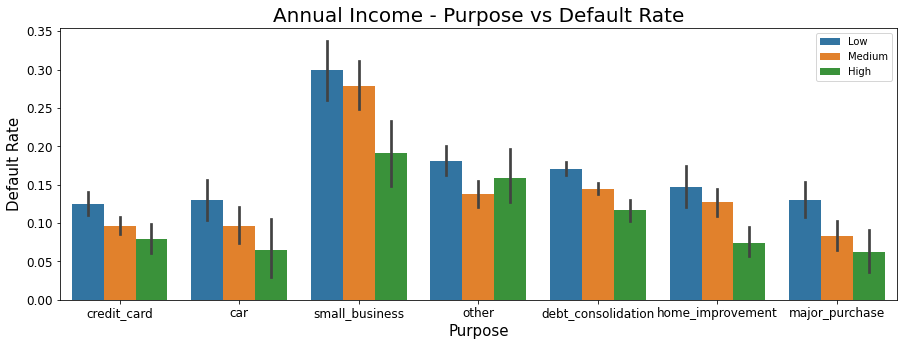

In [196]:
plt.figure(figsize=[15, 5])
sns.barplot(data=temp_dataset, x='purpose', y='default', hue='annual_inc_cat', estimator=np.mean)
plt.title('Annual Income - Purpose vs Default Rate', fontsize = 20)
plt.xlabel('Purpose', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Opinion: The purpose of car and small business for low annual income having more default rate followed by other and debt consolidation purpose.

### Annual Income - Employment Length vs Default Rate

In [197]:
loan_subset.emp_length_cat.value_counts()

0 - 4    19322
8+        9714
5 - 8     8508
Name: emp_length_cat, dtype: int64

In [198]:
(loan_subset['emp_length_cat'].value_counts() / loan_subset['emp_length_cat'].value_counts().sum()) * 100

0 - 4   51.46
8+      25.87
5 - 8   22.66
Name: emp_length_cat, dtype: float64

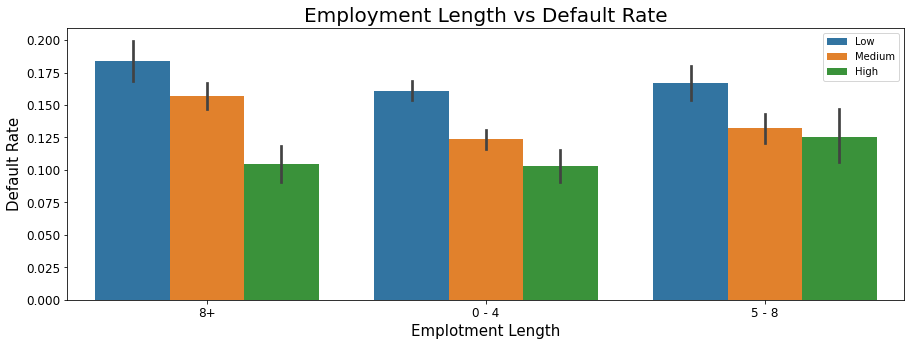

In [199]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='emp_length_cat', y='default', hue='annual_inc_cat', estimator=np.mean)
plt.title('Employment Length vs Default Rate', fontsize = 20)
plt.xlabel('Emplotment Length', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Opinion: 8+ employment length category for low annual income having more default rate than other employment length category.

### Annual Income - DTI vs Default Rate

In [200]:
loan_subset.dti_cat.value_counts()

Medium    18002
Low       12545
High       6997
Name: dti_cat, dtype: int64

In [201]:
(loan_subset['dti_cat'].value_counts() / loan_subset['dti_cat'].value_counts().sum()) * 100

Medium   47.95
Low      33.41
High     18.64
Name: dti_cat, dtype: float64

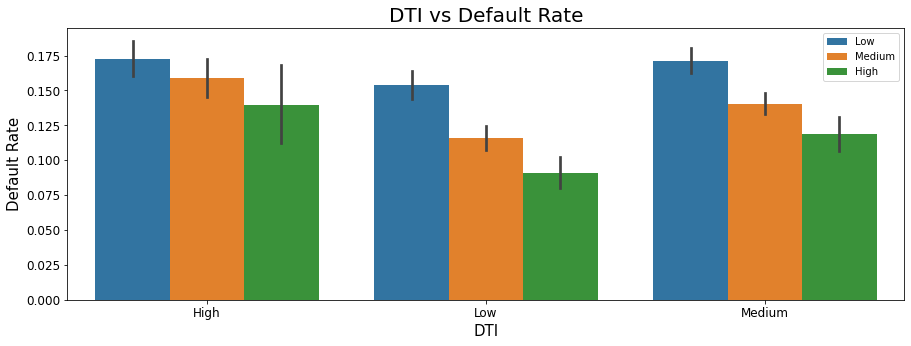

In [202]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='dti_cat', y='default', hue='annual_inc_cat', estimator=np.mean)
plt.title('DTI vs Default Rate', fontsize = 20)
plt.xlabel('DTI', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Opinion: There are slightly difference of default rate between high and medium dti for low annual income and also higher than low dti.

### Annual Income - Home Ownership vs Default Rate

In [203]:
loan_subset.home_ownership.value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [204]:
(loan_subset['home_ownership'].value_counts() / loan_subset['home_ownership'].value_counts().sum()) * 100

RENT       48.15
MORTGAGE   44.20
OWN         7.38
OTHER       0.26
NONE        0.01
Name: home_ownership, dtype: float64

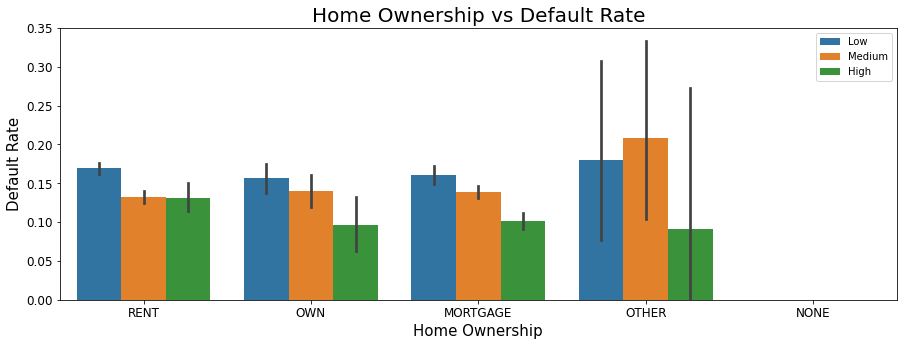

In [205]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='home_ownership', y='default', hue='annual_inc_cat', estimator=np.mean)
plt.title('Home Ownership vs Default Rate', fontsize = 20)
plt.xlabel('Home Ownership', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Note: We will be ignoring the home_ownership categories - Other and None as they constitute less than 1% of the entire distribution
#### Opinion: The default rate of all three types of home ownership (RENT, OWN, MORTGAGE) is very similar.

### Annual Income - Verification Status vs Default Rate

In [206]:
loan_subset.verification_status.value_counts()

Not Verified       16278
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64

In [207]:
(loan_subset['verification_status'].value_counts() / loan_subset['verification_status'].value_counts().sum()) * 100

Not Verified      43.36
Verified          31.36
Source Verified   25.29
Name: verification_status, dtype: float64

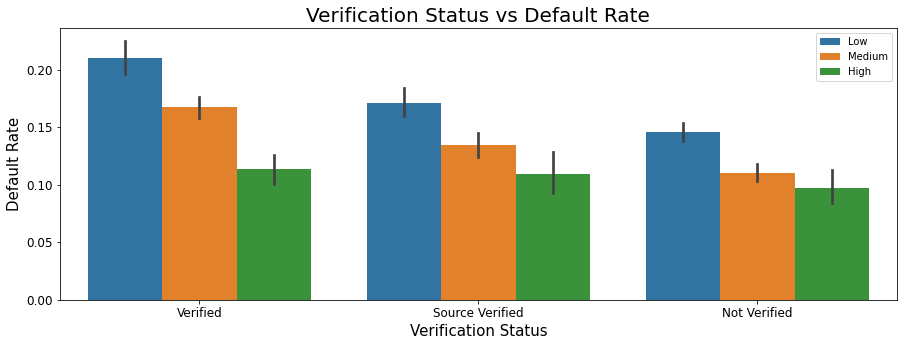

In [208]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='verification_status', y='default', hue='annual_inc_cat', estimator=np.mean)
plt.title('Verification Status vs Default Rate', fontsize = 20)
plt.xlabel('Verification Status', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Opinion: Verified loans for low annual income having more default rate.

### Annual Income - Issued Month vs Default Rate

In [209]:
loan_subset.issue_d_month.value_counts()

Dec    4120
Nov    3890
Oct    3637
Sep    3394
Aug    3321
Jul    3253
Jun    3094
May    2838
Apr    2756
Mar    2632
Jan    2331
Feb    2278
Name: issue_d_month, dtype: int64

In [210]:
(loan_subset['issue_d_month'].value_counts() / loan_subset['issue_d_month'].value_counts().sum()) * 100

Dec   10.97
Nov   10.36
Oct    9.69
Sep    9.04
Aug    8.85
Jul    8.66
Jun    8.24
May    7.56
Apr    7.34
Mar    7.01
Jan    6.21
Feb    6.07
Name: issue_d_month, dtype: float64

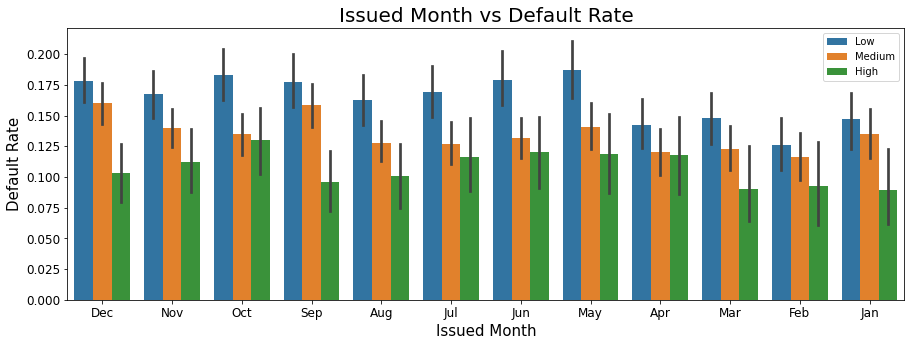

In [211]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='issue_d_month', y='default', hue='annual_inc_cat', estimator=np.mean)
plt.title('Issued Month vs Default Rate', fontsize = 20)
plt.xlabel('Issued Month', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Opinion: The month of May for low annual income has more default rate followed by October and December

### Annual Income - Sub Grade vs Default Rate

In [212]:
loan_subset.sub_grade.value_counts()

A4    2792
B3    2746
A5    2634
B5    2559
B4    2388
C1    2014
B2    1944
C2    1899
A3    1741
B1    1722
C3    1458
A2    1441
D2    1255
C4    1176
C5    1122
D3    1090
A1    1052
D1     916
D4     905
D5     813
E1     711
E2     605
E3     504
E4     419
E5     381
F1     301
F2     228
F3     172
F4     148
F5     110
G1      93
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [213]:
(loan_subset['sub_grade'].value_counts() / loan_subset['sub_grade'].value_counts().sum()) * 100

A4   7.44
B3   7.31
A5   7.02
B5   6.82
B4   6.36
C1   5.36
B2   5.18
C2   5.06
A3   4.64
B1   4.59
C3   3.88
A2   3.84
D2   3.34
C4   3.13
C5   2.99
D3   2.90
A1   2.80
D1   2.44
D4   2.41
D5   2.17
E1   1.89
E2   1.61
E3   1.34
E4   1.12
E5   1.01
F1   0.80
F2   0.61
F3   0.46
F4   0.39
F5   0.29
G1   0.25
G2   0.21
G4   0.14
G3   0.12
G5   0.08
Name: sub_grade, dtype: float64

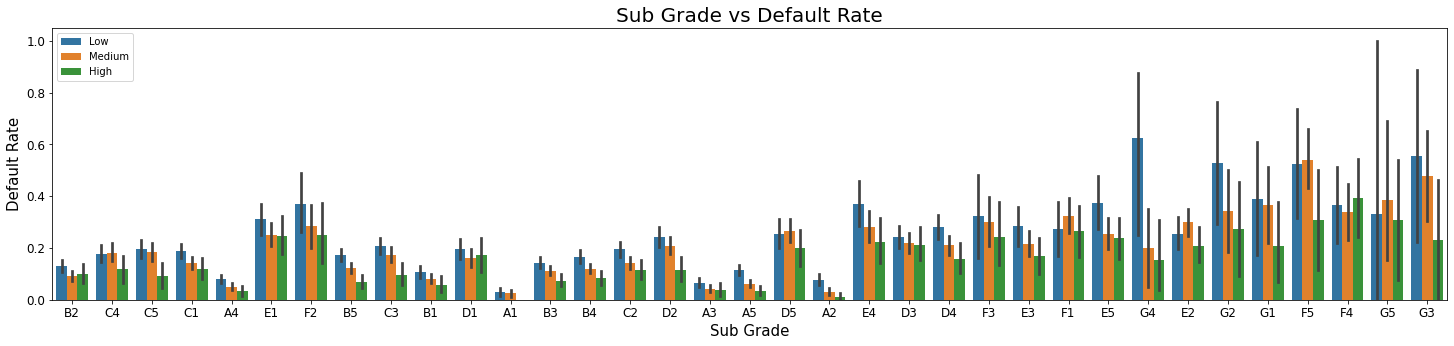

In [214]:
plt.figure(figsize=[25, 5])
sns.barplot(data=loan_subset, x='sub_grade', y='default', hue='annual_inc_cat', estimator=np.mean)
plt.title('Sub Grade vs Default Rate', fontsize = 20)
plt.xlabel('Sub Grade', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 12)
plt.legend(loc = 'best')
plt.show()

#### Opinion: G4 sub grade for low annual income have the highest default rate than other sub grade category.

This concludes the Bivariate Analysis of Annual Income and other Variables vs Default Rate<br>
Key takeaways:

1) `Purpose` - The purpose of car and small business for E grade having the similar default rate and also higher than other purpose.<br>
2) `Employment Length` - The all three categories for E grade having same default rate and for D grade there are high chance of default rate in 8+ type of employment length category.<br>
3) `DTI` - There are slightly difference of default rate in high and medium dti for E grade.<br>
4) `Home Ownership` - The default rates for the 3 Home Ownership Categories 'Rent', 'Own' and 'Mortgage' are pretty similar for E grade.<br>
5) `Verification Status`: The default rates for verified and source verified have not any significant difference but also higher than not verified type of verification status.<br>

### Purpose - Employment Length vs Default Rate

In [215]:
loan_subset.emp_length_cat.value_counts()

0 - 4    19322
8+        9714
5 - 8     8508
Name: emp_length_cat, dtype: int64

In [216]:
(loan_subset['emp_length_cat'].value_counts() / loan_subset['emp_length_cat'].value_counts().sum()) * 100

0 - 4   51.46
8+      25.87
5 - 8   22.66
Name: emp_length_cat, dtype: float64

In [217]:
(loan_subset['purpose'].value_counts() / loan_subset['purpose'].value_counts().sum()) * 100

debt_consolidation   47.08
credit_card          13.05
other                 9.89
home_improvement      7.42
major_purchase        5.54
small_business        4.55
car                   3.86
wedding               2.43
medical               1.75
moving                1.47
house                 0.94
vacation              0.93
educational           0.84
renewable_energy      0.25
Name: purpose, dtype: float64

In [218]:
# For the purpose clarity in the plot, we will be making use of the temp_dataset that we created in the previous analysis
(temp_dataset['purpose'].value_counts() / temp_dataset['purpose'].value_counts().sum()) * 100

debt_consolidation   51.52
credit_card          14.28
other                10.82
home_improvement      8.12
major_purchase        6.06
small_business        4.98
car                   4.22
Name: purpose, dtype: float64

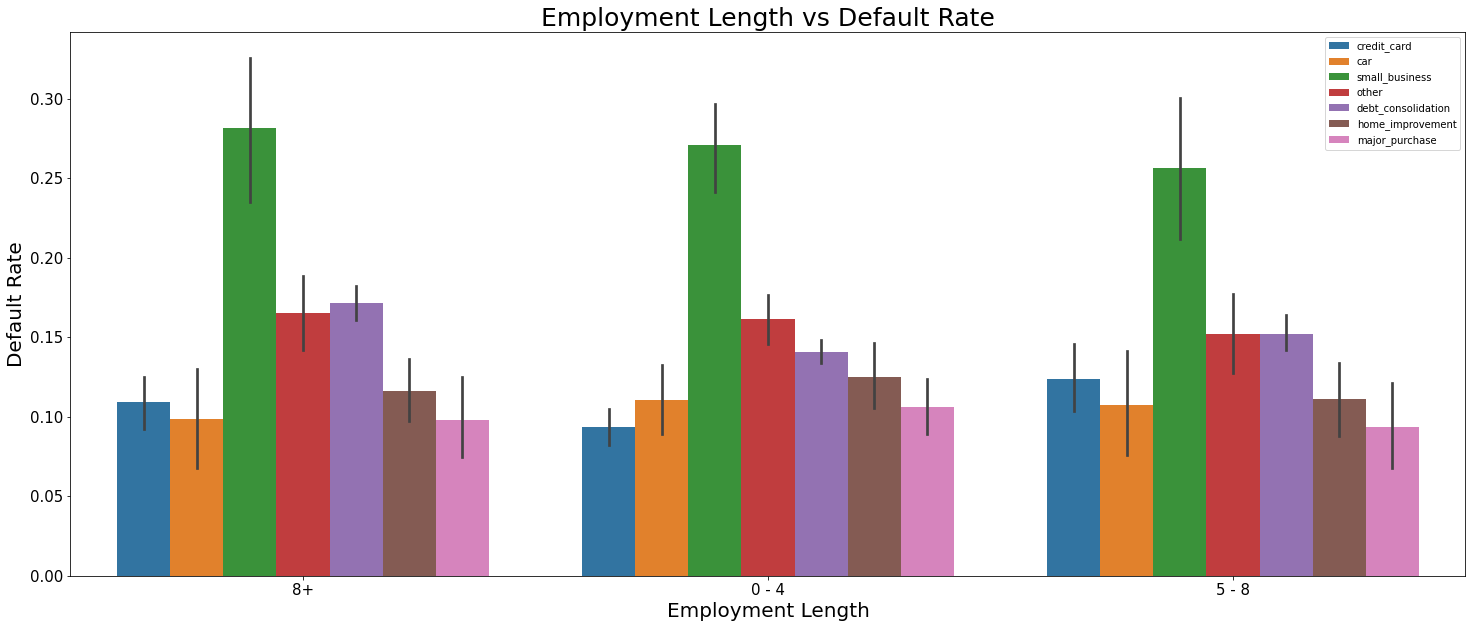

In [219]:
plt.figure(figsize=[25, 10])
sns.barplot(data=temp_dataset, x='emp_length_cat', y='default', hue='purpose', estimator=np.mean)
plt.title('Employment Length vs Default Rate', fontsize = 25)
plt.xlabel('Employment Length', fontsize = 20)
plt.ylabel('Default Rate', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.legend(loc = 'best')
plt.show()

#### Opinion: All three types of employment length(8+, 0-4, 5-8) for small business have not significant amount of difference in default rate and also have highest default rate than other.

### Purpose: DTI vs Default Rate

In [220]:
loan_subset.dti_cat.value_counts()

Medium    18002
Low       12545
High       6997
Name: dti_cat, dtype: int64

In [221]:
(loan_subset['dti_cat'].value_counts() / loan_subset['dti_cat'].value_counts().sum()) * 100

Medium   47.95
Low      33.41
High     18.64
Name: dti_cat, dtype: float64

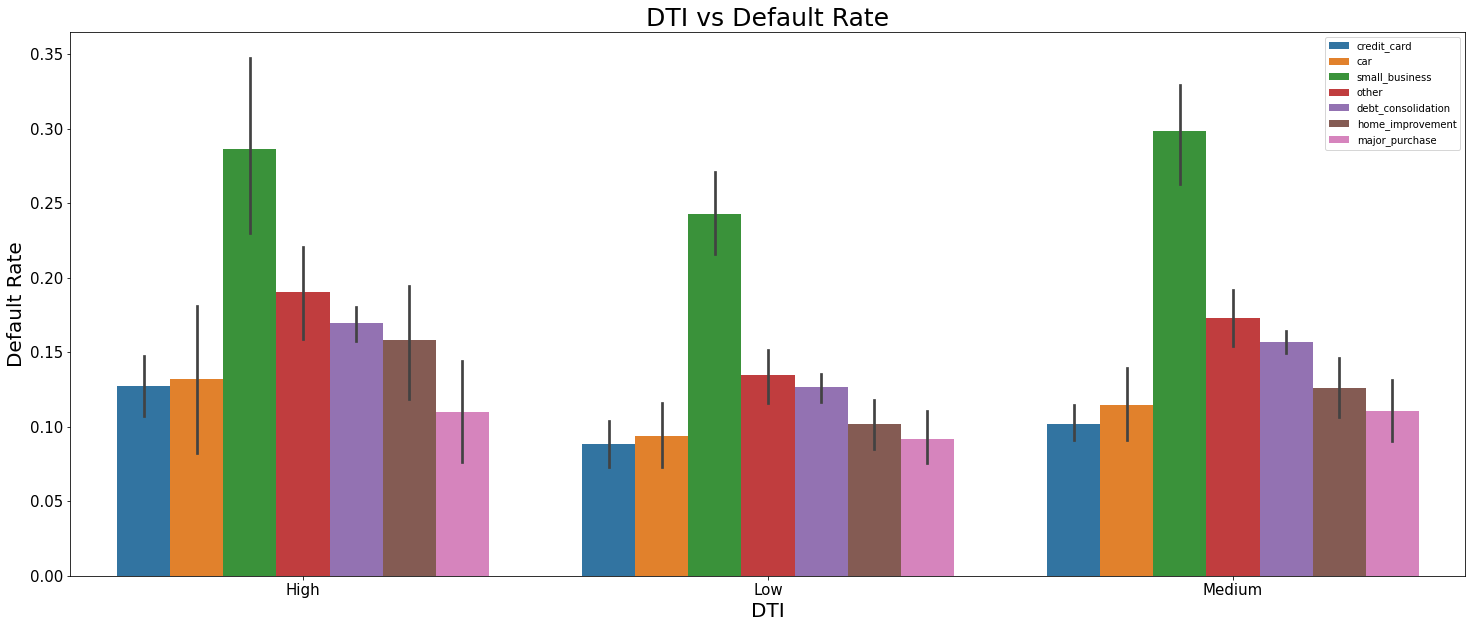

In [222]:
plt.figure(figsize=[25, 10])
sns.barplot(data=temp_dataset, x='dti_cat', y='default', hue='purpose', estimator=np.mean)
plt.title('DTI vs Default Rate', fontsize = 25)
plt.xlabel('DTI', fontsize = 20)
plt.ylabel('Default Rate', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.legend(loc = 'best')
plt.show()

#### Opinion: There are slightly difference of default rate between high and medium dti for small business.

### Purpose - Home Ownership vs Default Rate

In [223]:
loan_subset.home_ownership.value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [224]:
(loan_subset['home_ownership'].value_counts() / loan_subset['home_ownership'].value_counts().sum()) * 100

RENT       48.15
MORTGAGE   44.20
OWN         7.38
OTHER       0.26
NONE        0.01
Name: home_ownership, dtype: float64

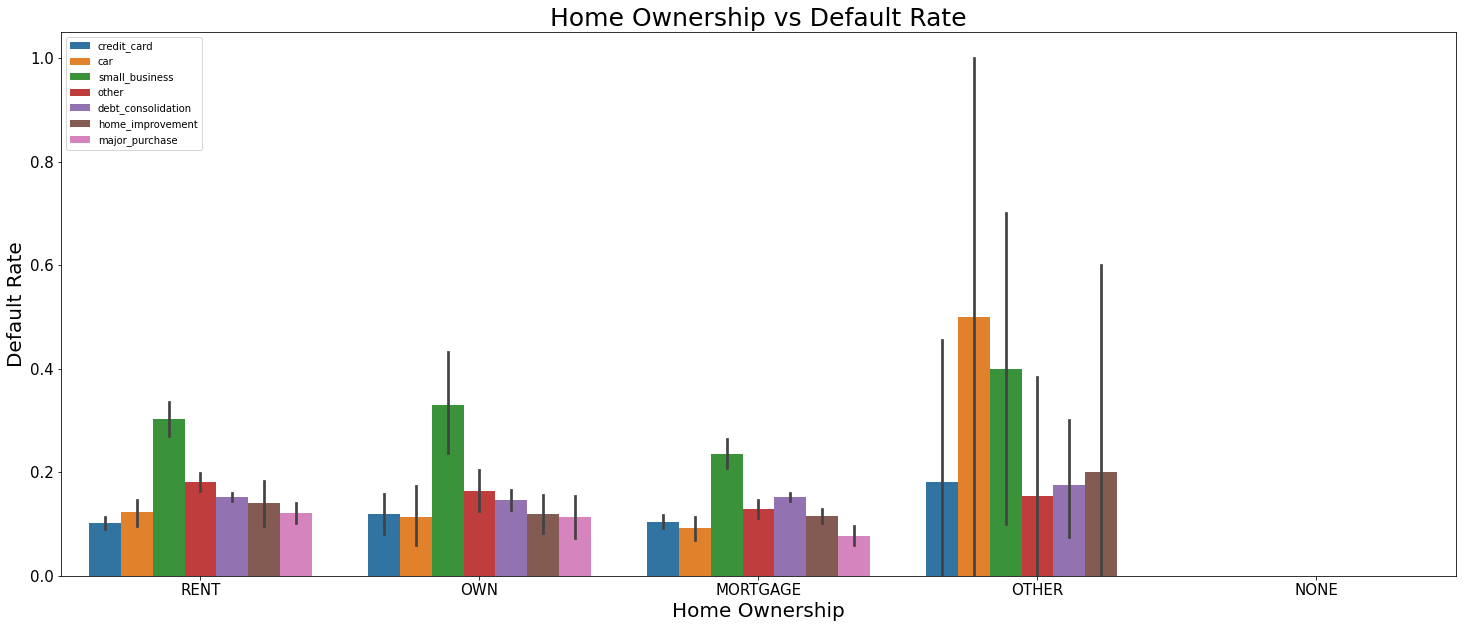

In [225]:
plt.figure(figsize=[25, 10])
sns.barplot(data=temp_dataset, x='home_ownership', y='default', hue='purpose', estimator=np.mean)
plt.title('Home Ownership vs Default Rate', fontsize = 25)
plt.xlabel('Home Ownership', fontsize = 20)
plt.ylabel('Default Rate', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.legend(loc = 'best')
plt.show()

#### Note: We will be ignoring the home_ownership categories - Other and None as they constitute less than 1% of the entire distribution
#### Opinion: Own type of home ownership for small business have the highest default rate.

### Purpose - Verification Status vs Default Rate

In [226]:
loan_subset.verification_status.value_counts()

Not Verified       16278
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64

In [227]:
(loan_subset['verification_status'].value_counts() / loan_subset['verification_status'].value_counts().sum()) * 100

Not Verified      43.36
Verified          31.36
Source Verified   25.29
Name: verification_status, dtype: float64

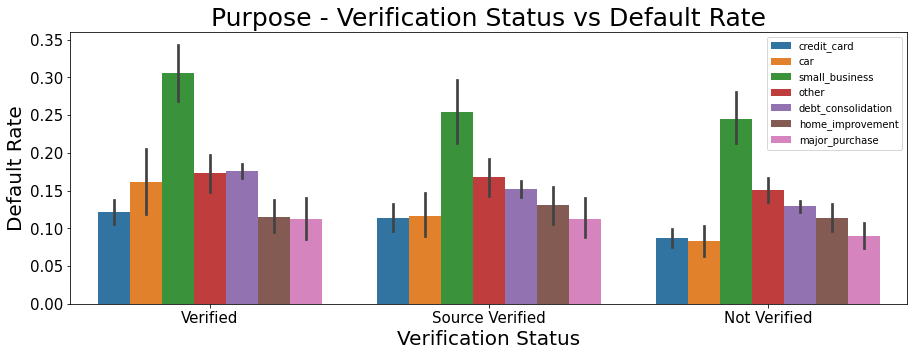

In [228]:
plt.figure(figsize=[15, 5])
sns.barplot(data=temp_dataset, x='verification_status', y='default', hue='purpose', estimator=np.mean)
plt.title('Purpose - Verification Status vs Default Rate', fontsize = 25)
plt.xlabel('Verification Status', fontsize = 20)
plt.ylabel('Default Rate', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.legend(loc = 'best')
plt.show()

#### Opinion: Verified loans for small business have the highest default rate.

This concludes the Bivariate Analysis of Purpose and other Variables vs Default Rate<br>
Key takeaways:

1) `Employment Length` - All three types of employment length(8+, 0-4, 5-8) for small business have not significant amount of difference in default rate and also have highest default rate than other.<br>
2) `DTI` - There are slightly difference of default rate between high and medium dti for small business.<br>
3) `Home Ownership` - Own type of home ownership for small business have the highest default rate.<br>
4) `Verification Status`: Verified loans for small business have the highest default rate.<br>

#### Employment Length - DTI vs Default Rate

In [229]:
loan_subset.dti_cat.value_counts()

Medium    18002
Low       12545
High       6997
Name: dti_cat, dtype: int64

In [230]:
(loan_subset['dti_cat'].value_counts() / loan_subset['dti_cat'].value_counts().sum()) * 100

Medium   47.95
Low      33.41
High     18.64
Name: dti_cat, dtype: float64

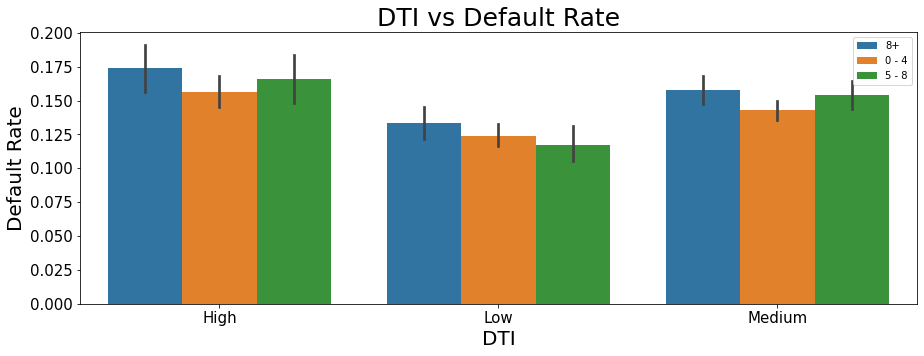

In [231]:
plt.figure(figsize=[15, 5])
sns.barplot(data=loan_subset, x='dti_cat', y='default', hue='emp_length_cat', estimator=np.mean)
plt.title('DTI vs Default Rate', fontsize = 25)
plt.xlabel('DTI', fontsize = 20)
plt.ylabel('Default Rate', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.legend(loc = 'best')
plt.show()

#### Opinion: The high dti for 8+ years employment length has the highest default rate.

#### Employment Length - Home Ownership vs Default Rate

In [232]:
loan_subset.home_ownership.value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [233]:
(loan_subset['home_ownership'].value_counts() / loan_subset['home_ownership'].value_counts().sum()) * 100

RENT       48.15
MORTGAGE   44.20
OWN         7.38
OTHER       0.26
NONE        0.01
Name: home_ownership, dtype: float64

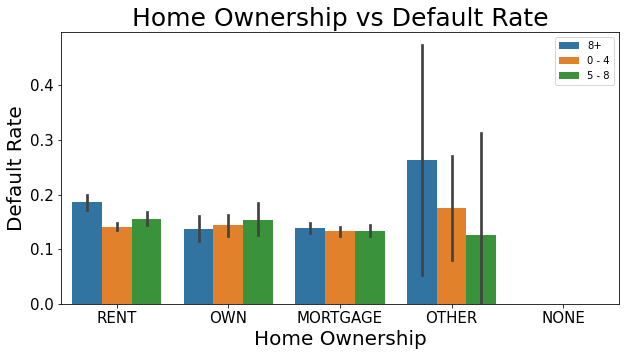

In [234]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='home_ownership', y='default', hue='emp_length_cat', estimator=np.mean)
plt.title('Home Ownership vs Default Rate', fontsize = 25)
plt.xlabel('Home Ownership', fontsize = 20)
plt.ylabel('Default Rate', fontsize = 20)
plt.tick_params(labelsize = 15)
plt.legend(loc = 'best')
plt.show()

#### Note: We will be ignoring the home_ownership categories - Other and None as they constitute less than 1% of the entire distribution
#### Opinion: Rent type of home ownership for 8+ years employment length have the highest default rate.

### Employment Length - Verification Status vs Default Rate

In [235]:
loan_subset.verification_status.value_counts()

Not Verified       16278
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64

In [236]:
(loan_subset['verification_status'].value_counts() / loan_subset['verification_status'].value_counts().sum()) * 100

Not Verified      43.36
Verified          31.36
Source Verified   25.29
Name: verification_status, dtype: float64

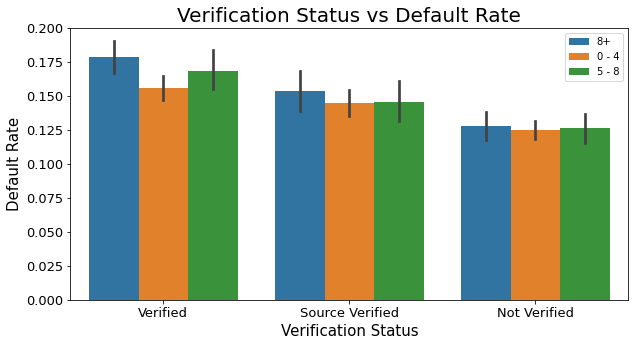

In [237]:
plt.figure(figsize=[10, 5])
sns.barplot(data=loan_subset, x='verification_status', y='default', hue='emp_length_cat', estimator=np.mean)
plt.title('Verification Status vs Default Rate', fontsize = 20)
plt.xlabel('Verification Status', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.legend(loc = 'best')
plt.show()

#### Opinion: Verified loans for 8+ years employment length has highest default rate.

### Employment Length - Issued Month vs Default Rate

In [238]:
loan_subset.issue_d_month.value_counts()

Dec    4120
Nov    3890
Oct    3637
Sep    3394
Aug    3321
Jul    3253
Jun    3094
May    2838
Apr    2756
Mar    2632
Jan    2331
Feb    2278
Name: issue_d_month, dtype: int64

In [239]:
(loan_subset['issue_d_month'].value_counts() / loan_subset['issue_d_month'].value_counts().sum()) * 100

Dec   10.97
Nov   10.36
Oct    9.69
Sep    9.04
Aug    8.85
Jul    8.66
Jun    8.24
May    7.56
Apr    7.34
Mar    7.01
Jan    6.21
Feb    6.07
Name: issue_d_month, dtype: float64

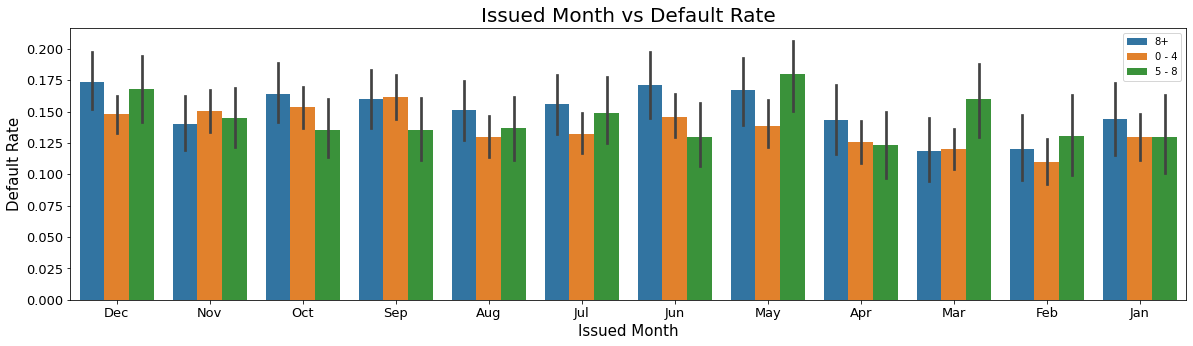

In [240]:
plt.figure(figsize=[20, 5])
sns.barplot(data=loan_subset, x='issue_d_month', y='default', hue='emp_length_cat', estimator=np.mean)
plt.title('Issued Month vs Default Rate', fontsize = 20)
plt.xlabel('Issued Month', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.legend(loc = 'best')
plt.show()

#### Opinion: The month of May for 5-8 years employment length has more default rate.

### Employment Length - Sub Grade vs Default Rate

In [241]:
loan_subset.sub_grade.value_counts()

A4    2792
B3    2746
A5    2634
B5    2559
B4    2388
C1    2014
B2    1944
C2    1899
A3    1741
B1    1722
C3    1458
A2    1441
D2    1255
C4    1176
C5    1122
D3    1090
A1    1052
D1     916
D4     905
D5     813
E1     711
E2     605
E3     504
E4     419
E5     381
F1     301
F2     228
F3     172
F4     148
F5     110
G1      93
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [242]:
(loan_subset['sub_grade'].value_counts() / loan_subset['sub_grade'].value_counts().sum()) * 100

A4   7.44
B3   7.31
A5   7.02
B5   6.82
B4   6.36
C1   5.36
B2   5.18
C2   5.06
A3   4.64
B1   4.59
C3   3.88
A2   3.84
D2   3.34
C4   3.13
C5   2.99
D3   2.90
A1   2.80
D1   2.44
D4   2.41
D5   2.17
E1   1.89
E2   1.61
E3   1.34
E4   1.12
E5   1.01
F1   0.80
F2   0.61
F3   0.46
F4   0.39
F5   0.29
G1   0.25
G2   0.21
G4   0.14
G3   0.12
G5   0.08
Name: sub_grade, dtype: float64

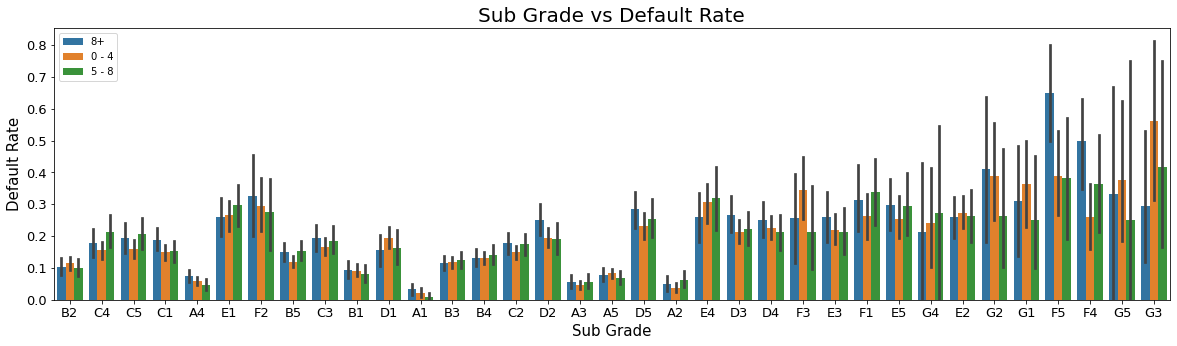

In [243]:
plt.figure(figsize=[20, 5])
sns.barplot(data=loan_subset, x='sub_grade', y='default', hue='emp_length_cat', estimator=np.mean)
plt.title('Sub Grade vs Default Rate', fontsize = 20)
plt.xlabel('Sub Grade', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.legend(loc = 'best')
plt.show()

#### Opinion: F5 sub grade for 8+ years employment length has highest default rate.

This concludes the Bivariate Analysis of Employment Length and other Variables vs Default Rate<br>
Key takeaways:

1) `DTI` - The high dti for 8+ years employment length has the highest default rate.<br>
2) `Home Ownership` - Rent type of home ownership for 8+ years employment length have the highest default rate.<br>
3) `Verification Status`: Verified loans for 8+ years employment length has highest default rate.<br>
4) `Issued Month` - The month of May for 5-8 years employment length has more default rate.<br>
5) `Sub Grade` - F5 sub grade for 8+ years employment length has highest default rate.<br>

### DTI - Home Ownership vs Default Rate

In [244]:
loan_subset.home_ownership.value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [245]:
(loan_subset['home_ownership'].value_counts() / loan_subset['home_ownership'].value_counts().sum()) * 100

RENT       48.15
MORTGAGE   44.20
OWN         7.38
OTHER       0.26
NONE        0.01
Name: home_ownership, dtype: float64

#### DTI Category
- Low (<10)
- Medium(10 to 20)
- High(>20)

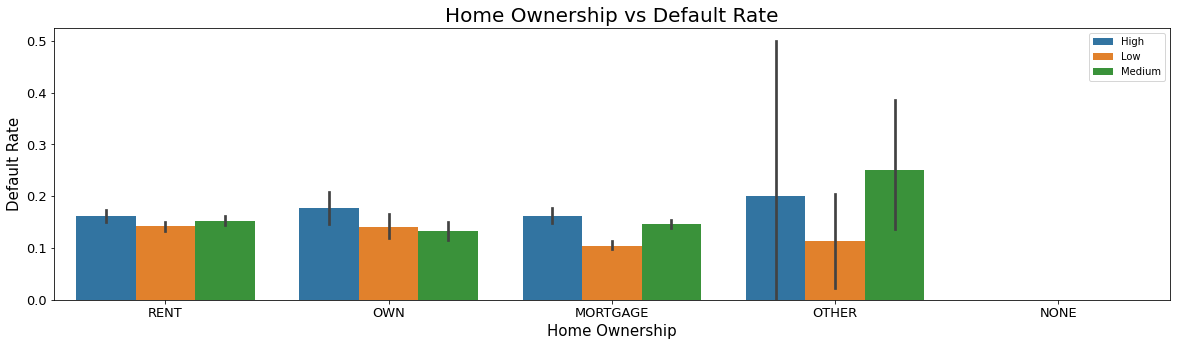

In [246]:
plt.figure(figsize=[20, 5])
sns.barplot(data=loan_subset, x='home_ownership', y='default', hue='dti_cat', estimator=np.mean)
plt.title('Home Ownership vs Default Rate', fontsize = 20)
plt.xlabel('Home Ownership', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.legend(loc = 'best')
plt.show()

#### Note: We will be ignoring the home_ownership categories - Other and None as they constitute less than 1% of the entire distribution
#### Opinion: There are slightly difference of default rate between own and mortgage type of home ownership category for high dti.

### DTI - Verification Status vs Default Rate

In [247]:
loan_subset.verification_status.value_counts()

Not Verified       16278
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64

In [248]:
(loan_subset['verification_status'].value_counts() / loan_subset['verification_status'].value_counts().sum()) * 100

Not Verified      43.36
Verified          31.36
Source Verified   25.29
Name: verification_status, dtype: float64

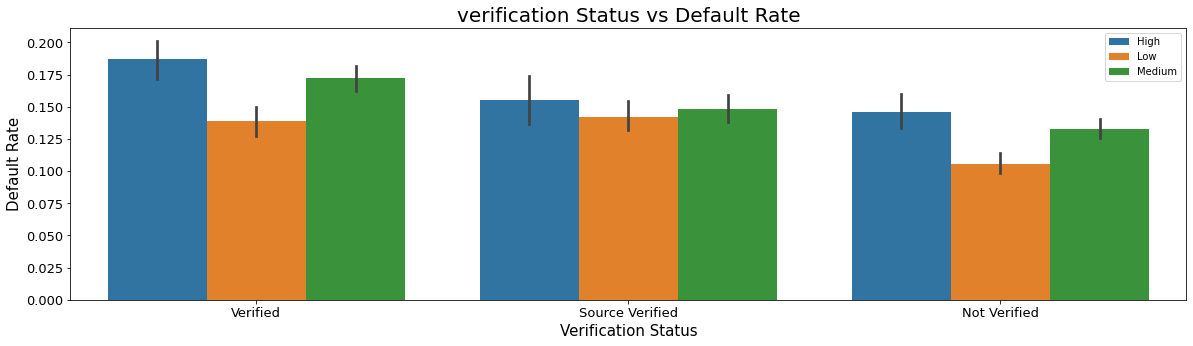

In [249]:
plt.figure(figsize=[20, 5])
sns.barplot(data=loan_subset, x='verification_status', y='default', hue='dti_cat', estimator=np.mean)
plt.title('verification Status vs Default Rate', fontsize = 20)
plt.xlabel('Verification Status', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.legend(loc = 'best')
plt.show()

#### Opinion: Verified loans for high dti has the highest default rate.

### DTI - Issued Month vs Default Rate

In [250]:
loan_subset.issue_d_month.value_counts()

Dec    4120
Nov    3890
Oct    3637
Sep    3394
Aug    3321
Jul    3253
Jun    3094
May    2838
Apr    2756
Mar    2632
Jan    2331
Feb    2278
Name: issue_d_month, dtype: int64

In [251]:
(loan_subset['issue_d_month'].value_counts() / loan_subset['issue_d_month'].value_counts().sum()) * 100

Dec   10.97
Nov   10.36
Oct    9.69
Sep    9.04
Aug    8.85
Jul    8.66
Jun    8.24
May    7.56
Apr    7.34
Mar    7.01
Jan    6.21
Feb    6.07
Name: issue_d_month, dtype: float64

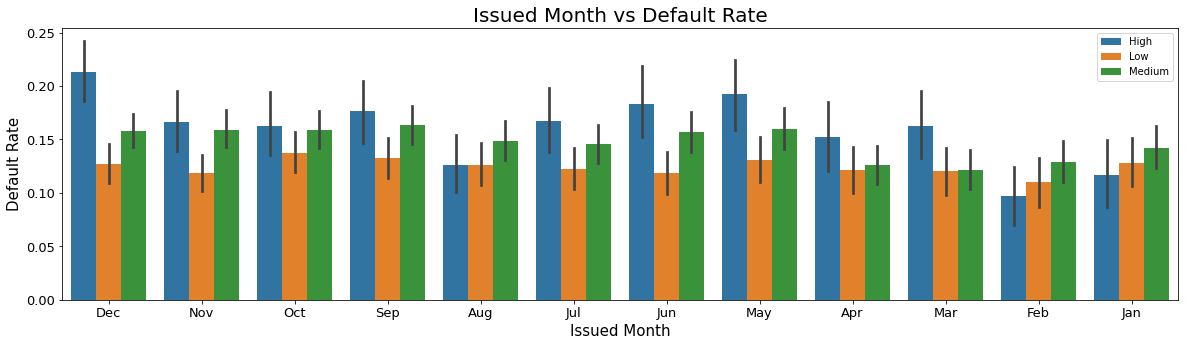

In [252]:
plt.figure(figsize=[20, 5])
sns.barplot(data=loan_subset, x='issue_d_month', y='default', hue='dti_cat', estimator=np.mean)
plt.title('Issued Month vs Default Rate', fontsize = 20)
plt.xlabel('Issued Month', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.legend(loc = 'best')
plt.show()

#### Opinion: The month of December for high dti has the highest default rate followed by May and June.

### DTI - Sub Grade vs Default Rate

In [253]:
loan_subset.sub_grade.value_counts()

A4    2792
B3    2746
A5    2634
B5    2559
B4    2388
C1    2014
B2    1944
C2    1899
A3    1741
B1    1722
C3    1458
A2    1441
D2    1255
C4    1176
C5    1122
D3    1090
A1    1052
D1     916
D4     905
D5     813
E1     711
E2     605
E3     504
E4     419
E5     381
F1     301
F2     228
F3     172
F4     148
F5     110
G1      93
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [254]:
(loan_subset['sub_grade'].value_counts() / loan_subset['sub_grade'].value_counts().sum()) * 100

A4   7.44
B3   7.31
A5   7.02
B5   6.82
B4   6.36
C1   5.36
B2   5.18
C2   5.06
A3   4.64
B1   4.59
C3   3.88
A2   3.84
D2   3.34
C4   3.13
C5   2.99
D3   2.90
A1   2.80
D1   2.44
D4   2.41
D5   2.17
E1   1.89
E2   1.61
E3   1.34
E4   1.12
E5   1.01
F1   0.80
F2   0.61
F3   0.46
F4   0.39
F5   0.29
G1   0.25
G2   0.21
G4   0.14
G3   0.12
G5   0.08
Name: sub_grade, dtype: float64

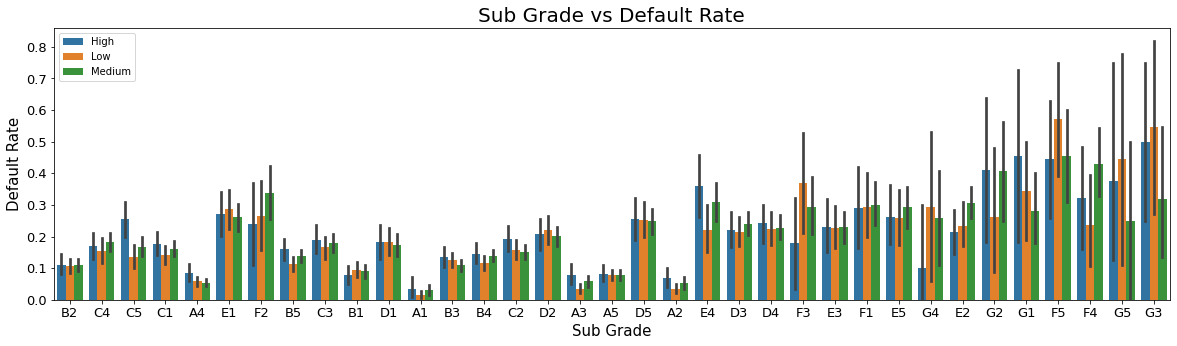

In [255]:
plt.figure(figsize=[20, 5])
sns.barplot(data=loan_subset, x='sub_grade', y='default', hue='dti_cat', estimator=np.mean)
plt.title('Sub Grade vs Default Rate', fontsize = 20)
plt.xlabel('Sub Grade', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.legend(loc = 'best')
plt.show()

#### Opinion: F5 sub grade for low dti has the highest default rate followed by G3

This concludes the Bivariate Analysis of DTI and other Variables vs Default Rate<br>
Key takeaways:

1) `Home Ownership` - There are slightly difference of default rate between own and mortgage type of home ownership category for high dti.<br>
2) `Verification Status`: Verified loans for high dti has the highest default rate.<br>
3) `Issued Month` - The month of December for high dti has the highest default rate followed by May and June.<br>
4) `Sub Grade` - F5 sub grade for low dti has the highest default rate followed by G3.<br>

### Home Ownership - Verification Status vs Default Rate

In [256]:
loan_subset.verification_status.value_counts()

Not Verified       16278
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64

In [257]:
(loan_subset['verification_status'].value_counts() / loan_subset['verification_status'].value_counts().sum()) * 100

Not Verified      43.36
Verified          31.36
Source Verified   25.29
Name: verification_status, dtype: float64

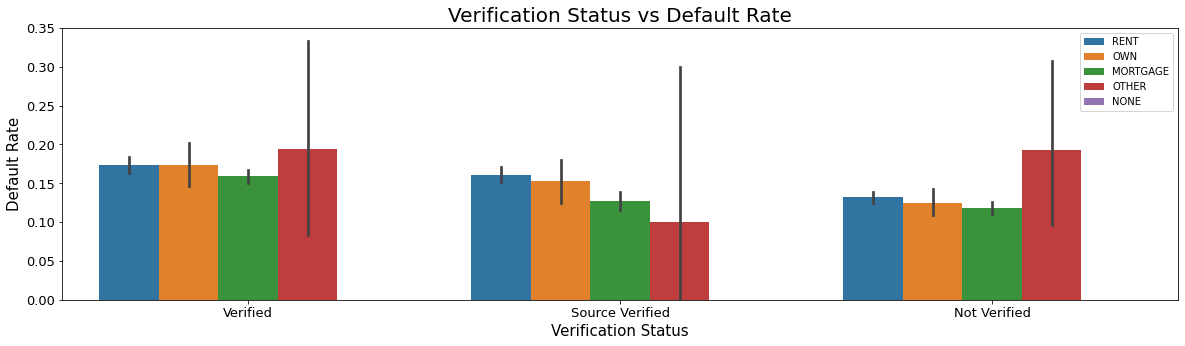

In [258]:
plt.figure(figsize=[20, 5])
sns.barplot(data=loan_subset, x='verification_status', y='default', hue='home_ownership', estimator=np.mean)
plt.title('Verification Status vs Default Rate', fontsize = 20)
plt.xlabel('Verification Status', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.legend(loc = 'best')
plt.show()

#### Note: We will be ignoring the home_ownership categories - Other and None as they constitute less than 1% of the entire distribution
#### Opinion: There are slightly difference of default rate between verified and source verified loans for rent type of home ownership category.

### Home Ownership - Issued Month vs Default Rate

In [259]:
loan_subset.issue_d_month.value_counts()

Dec    4120
Nov    3890
Oct    3637
Sep    3394
Aug    3321
Jul    3253
Jun    3094
May    2838
Apr    2756
Mar    2632
Jan    2331
Feb    2278
Name: issue_d_month, dtype: int64

In [260]:
(loan_subset['issue_d_month'].value_counts() / loan_subset['issue_d_month'].value_counts().sum()) * 100

Dec   10.97
Nov   10.36
Oct    9.69
Sep    9.04
Aug    8.85
Jul    8.66
Jun    8.24
May    7.56
Apr    7.34
Mar    7.01
Jan    6.21
Feb    6.07
Name: issue_d_month, dtype: float64

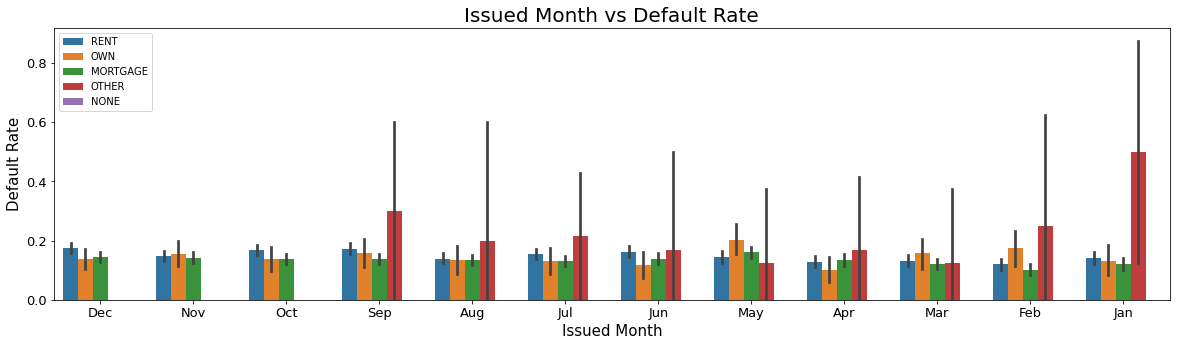

In [261]:
plt.figure(figsize=[20, 5])
sns.barplot(data=loan_subset, x='issue_d_month', y='default', hue='home_ownership', estimator=np.mean)
plt.title('Issued Month vs Default Rate', fontsize = 20)
plt.xlabel('Issued Month', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.legend(loc = 'best')
plt.show()

#### Note: We will be ignoring the home_ownership categories - Other and None as they constitute less than 1% of the entire distribution
#### Opinion: The month of May for own type of home ownership has more default rate.

This concludes the Bivariate Analysis of Home Ownership and other Variables vs Default Rate<br>
Key takeaways:

1) `Verification Status`: There are slightly difference of default rate between verified and source verified loans for rent type of home ownership category.<br>
2) `Issued Month` - The month of May for own type of home ownership has more default rate.<br>
3) `Sub Grade` - <br>

### Verification Status - Issued Month vs Default Rate

In [262]:
loan_subset.issue_d_month.value_counts()

Dec    4120
Nov    3890
Oct    3637
Sep    3394
Aug    3321
Jul    3253
Jun    3094
May    2838
Apr    2756
Mar    2632
Jan    2331
Feb    2278
Name: issue_d_month, dtype: int64

In [263]:
(loan_subset['issue_d_month'].value_counts() / loan_subset['issue_d_month'].value_counts().sum()) * 100

Dec   10.97
Nov   10.36
Oct    9.69
Sep    9.04
Aug    8.85
Jul    8.66
Jun    8.24
May    7.56
Apr    7.34
Mar    7.01
Jan    6.21
Feb    6.07
Name: issue_d_month, dtype: float64

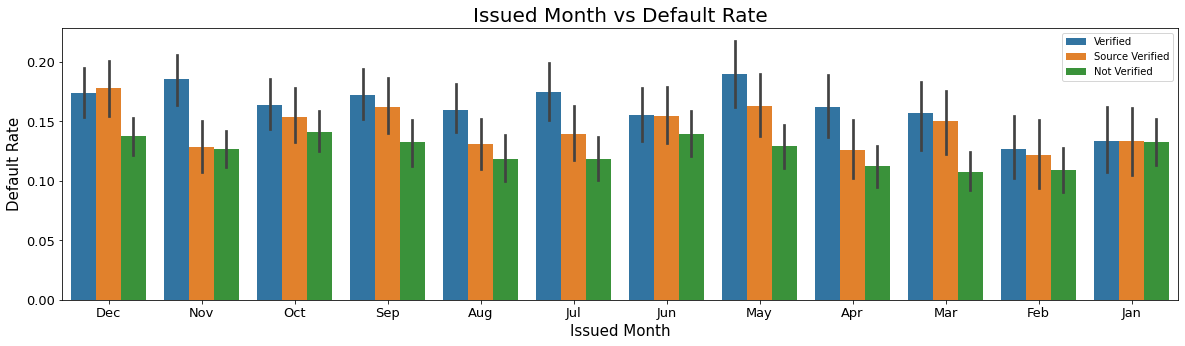

In [264]:
plt.figure(figsize=[20, 5])
sns.barplot(data=loan_subset, x='issue_d_month', y='default', hue='verification_status', estimator=np.mean)
plt.title('Issued Month vs Default Rate', fontsize = 20)
plt.xlabel('Issued Month', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.legend(loc = 'best')
plt.show()

#### Opinion: The month of May for verified loans has the highest default rate.

### Verification Status - Sub Grade vs Default Rate

In [265]:
loan_subset.sub_grade.value_counts()

A4    2792
B3    2746
A5    2634
B5    2559
B4    2388
C1    2014
B2    1944
C2    1899
A3    1741
B1    1722
C3    1458
A2    1441
D2    1255
C4    1176
C5    1122
D3    1090
A1    1052
D1     916
D4     905
D5     813
E1     711
E2     605
E3     504
E4     419
E5     381
F1     301
F2     228
F3     172
F4     148
F5     110
G1      93
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [266]:
(loan_subset['sub_grade'].value_counts() / loan_subset['sub_grade'].value_counts().sum()) * 100

A4   7.44
B3   7.31
A5   7.02
B5   6.82
B4   6.36
C1   5.36
B2   5.18
C2   5.06
A3   4.64
B1   4.59
C3   3.88
A2   3.84
D2   3.34
C4   3.13
C5   2.99
D3   2.90
A1   2.80
D1   2.44
D4   2.41
D5   2.17
E1   1.89
E2   1.61
E3   1.34
E4   1.12
E5   1.01
F1   0.80
F2   0.61
F3   0.46
F4   0.39
F5   0.29
G1   0.25
G2   0.21
G4   0.14
G3   0.12
G5   0.08
Name: sub_grade, dtype: float64

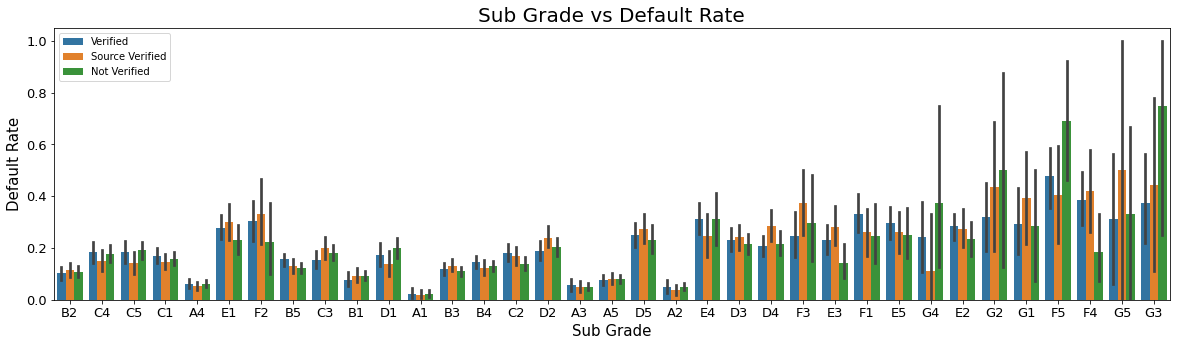

In [267]:
plt.figure(figsize=[20, 5])
sns.barplot(data=loan_subset, x='sub_grade', y='default', hue='verification_status', estimator=np.mean)
plt.title('Sub Grade vs Default Rate', fontsize = 20)
plt.xlabel('Sub Grade', fontsize = 15)
plt.ylabel('Default Rate', fontsize = 15)
plt.tick_params(labelsize = 13)
plt.legend(loc = 'best')
plt.show()

#### Opinion: G3 sub grade for not verified loans has the highest default rate.

This concludes the Bivariate Analysis of Verification Status and other Variables vs Default Rate<br>
Key takeaways:

2) `Issued Month` - The month of May for verified loans has the highest default rate.<br>
3) `Sub Grade` - G3 sub grade for not verified loans has the highest default rate.<br>

### Recommendations/Observations


#### Grade: Higher the grade (A to G with G being the highest and A being the lowest), higher the chance of default.
- Excluding grades F and G we can notice that applicants with a High loan amount from grade E have defaulted the most when compared to other categories.
- We can see that applicants with Low Income Category from grade E have defaulted the most.
#### Purpose: Highest default rate was observed for the loan purpose – Small Business
- We can see that majority of the applicants defaulted when the purpose was Small Business and the Verification Status was Verified.
- We can see that the default rate was the highest when the Purpose was Small Business and Annual Income was Low.
#### Term: Default rate was the highest for 60 months Term.
- We will ignore all the categories of purpose, below ‘small_business’ as the percentages of applicants for those categories are very small.
- Majority of the defaulters had Low Annual Income and chose 60 months Term.
#### Annual Income: Lower the annual income higher the chance of default. Highest default rate was observed for Low Annual Income (< 50000).
#### Interest Rate: Higher the interest, higher the default rate. Highest default rate was observed for High Interest Rate (15 – 20 %).
- We will be ignoring the ‘Very High’ category of the Interest Rate as the percentage of applicants for that category is very less.
- we can see that applicants with High Interest Rate have defaulted the most when the Term is 60 months.
#### Loan Amount: Higher the loan amount, higher the default rate. Highest default rate was observed for High Loan Amount (21000 to 28000).
- We will ignore Very High Loan Amount and Very High Interest Rate categories as the percentages of applicants for these 2 categories are very less.
- when the Loan Amount and Interest Rates are High, the Default Rate is also High.